### Hierarchical Clustering 层次聚类
+ No need to pre-specify number of clusters.
+ Using attractive tree-based representation of the observations, called a **dendrogram**.
+ Most common type is bottom-up or Agglomerative clustering.
+ Built starting from the leaves and combining clusters up to the trunk.


+ 无需预先指定聚类数。
+ 使用有吸引力的基于树的观察表示，称为**树状图**。
+ 最常见的类型是自下而上或凝聚聚类。
+ 从叶子开始构建，并将聚类组合到树干。

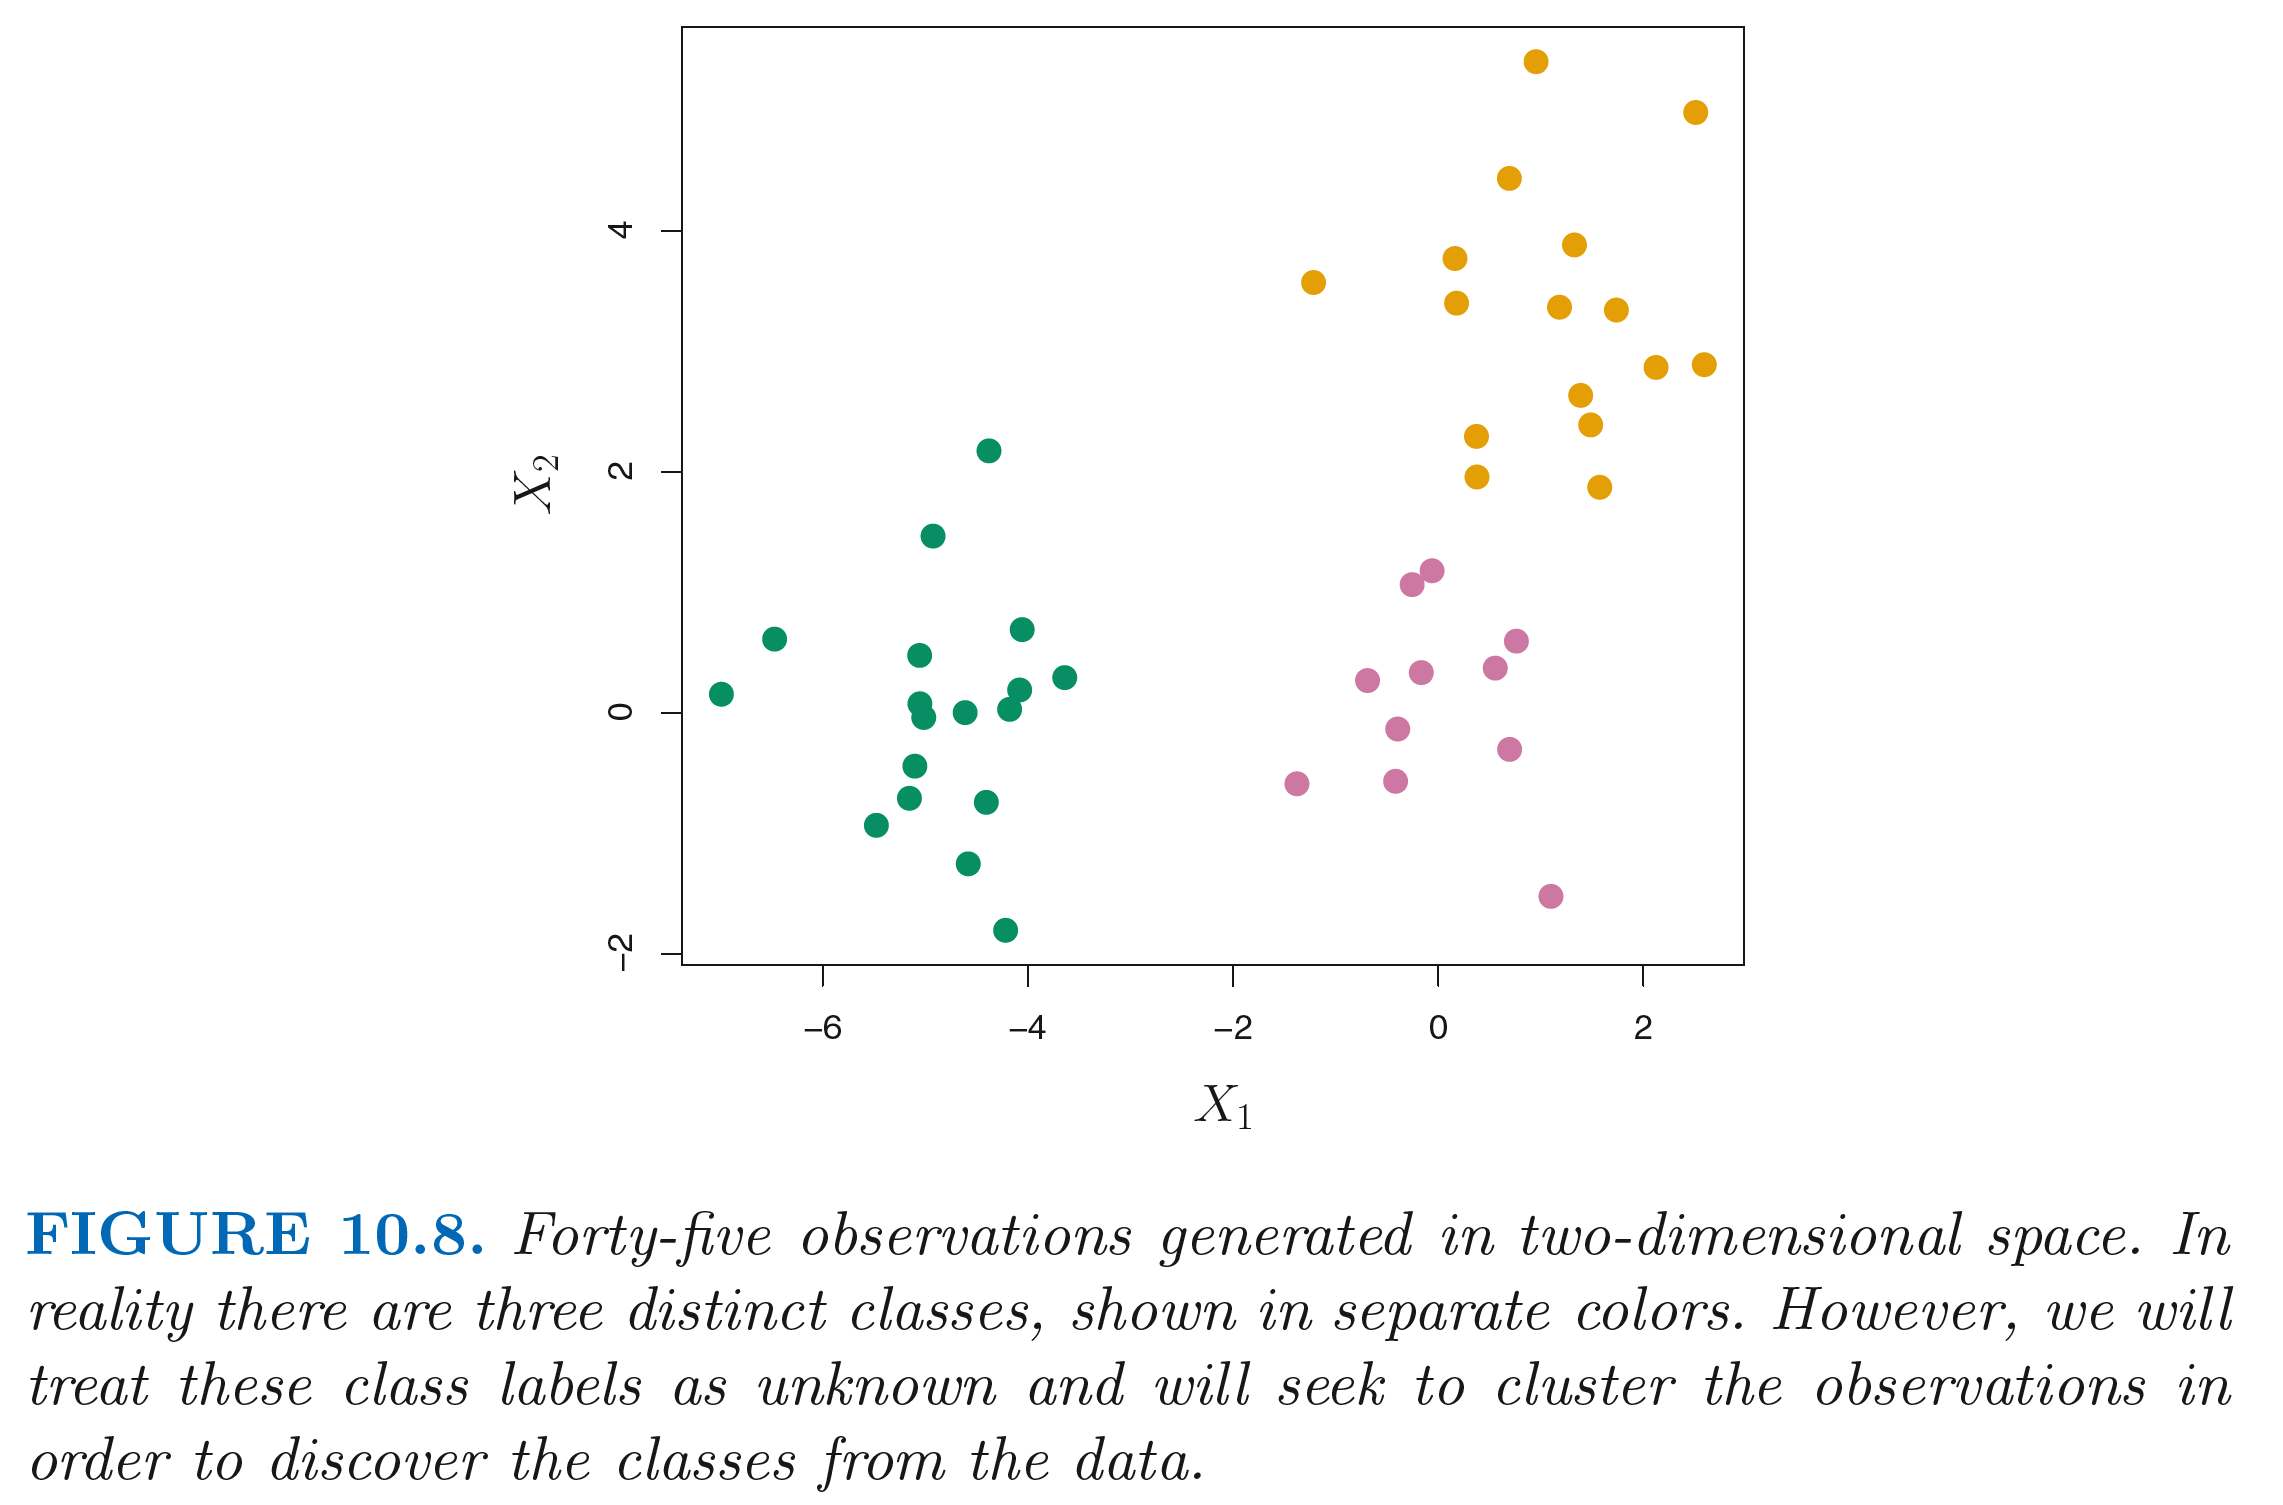

In [ ]:
from IPython.display import Image
Image('pw104.PNG', width =700)

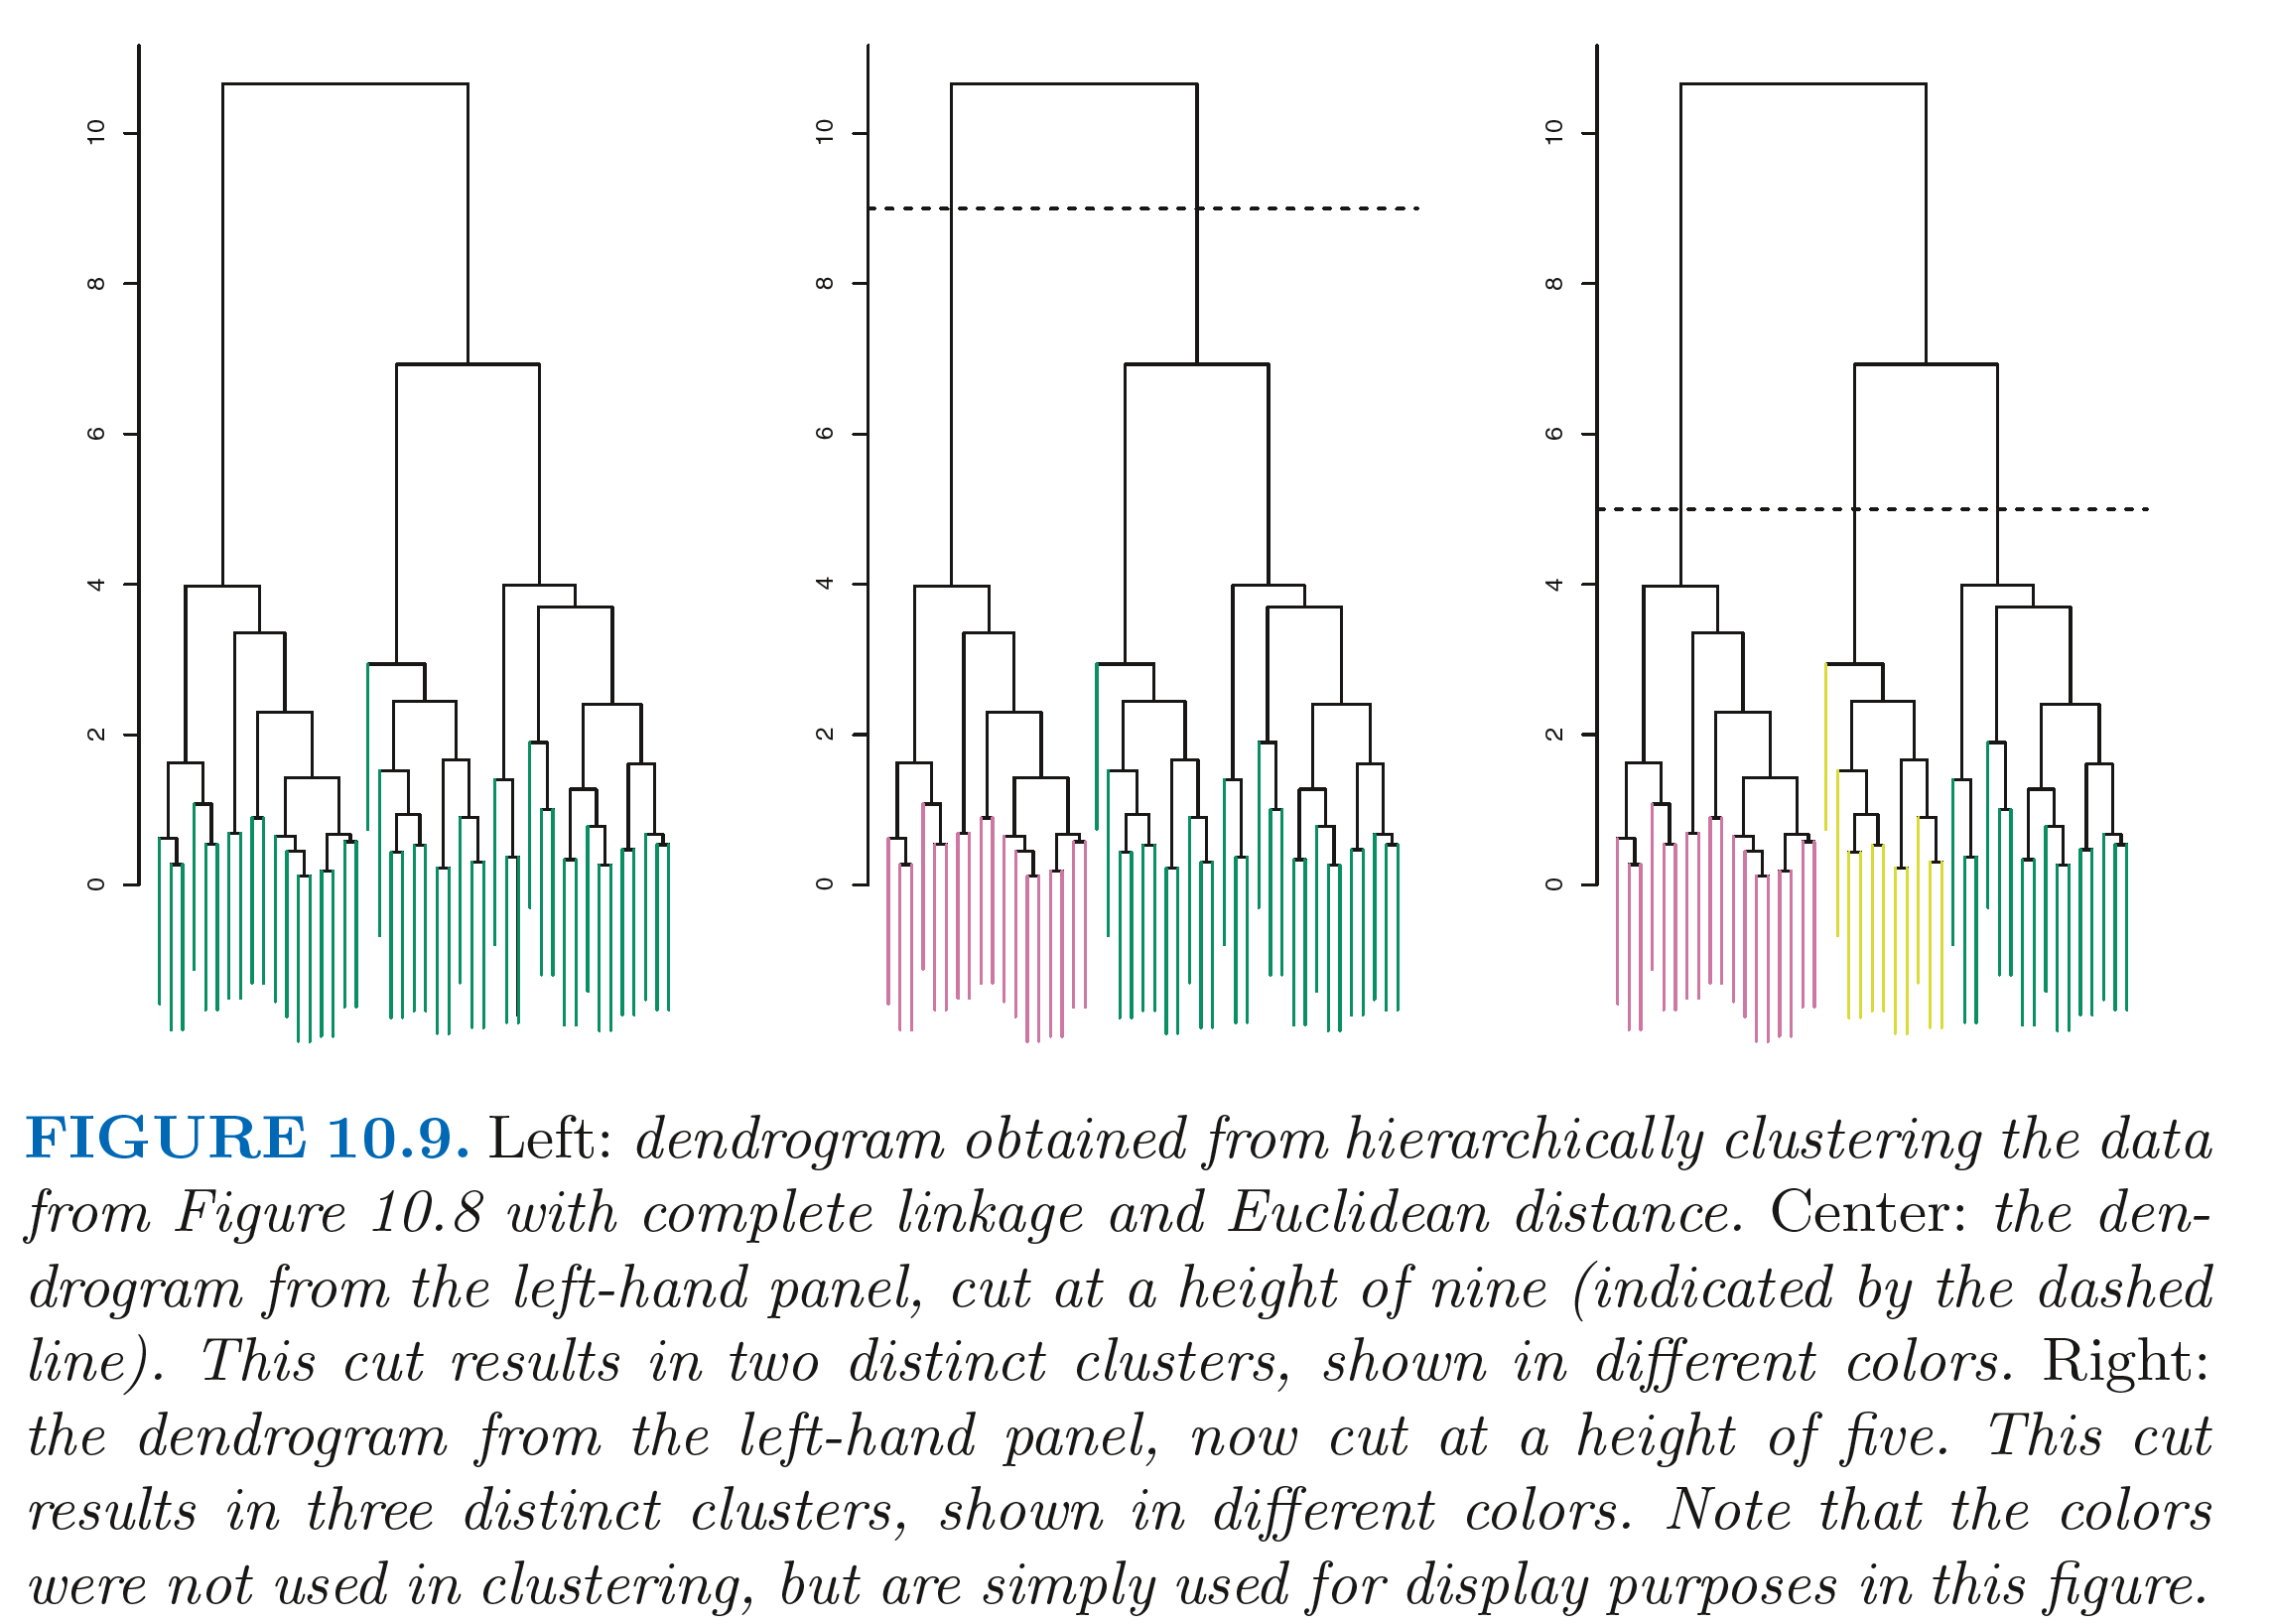

In [ ]:
Image('pw105.PNG', width =800)

#### Interpreting Dendogram 解释树状图
+ Similarity of points should be determined by the vertical axis not the horizontal axis.
+ The lower on the dendogram that they are connected, the closer they are.

+ Hierarchical clustering works by putting each point in its own cluster.
+ Then each pairwise dissimilarity is computed and the least dissimilar clusters are fused.

+ 点的相似性应由纵轴而不是横轴决定。
+ 它们在树状图上的连接越低，它们就越接近。

+ 层次聚类的工作原理是将每个点放在自己的聚类中。
+ 然后计算每对相异度，并融合相异度最小的聚类。


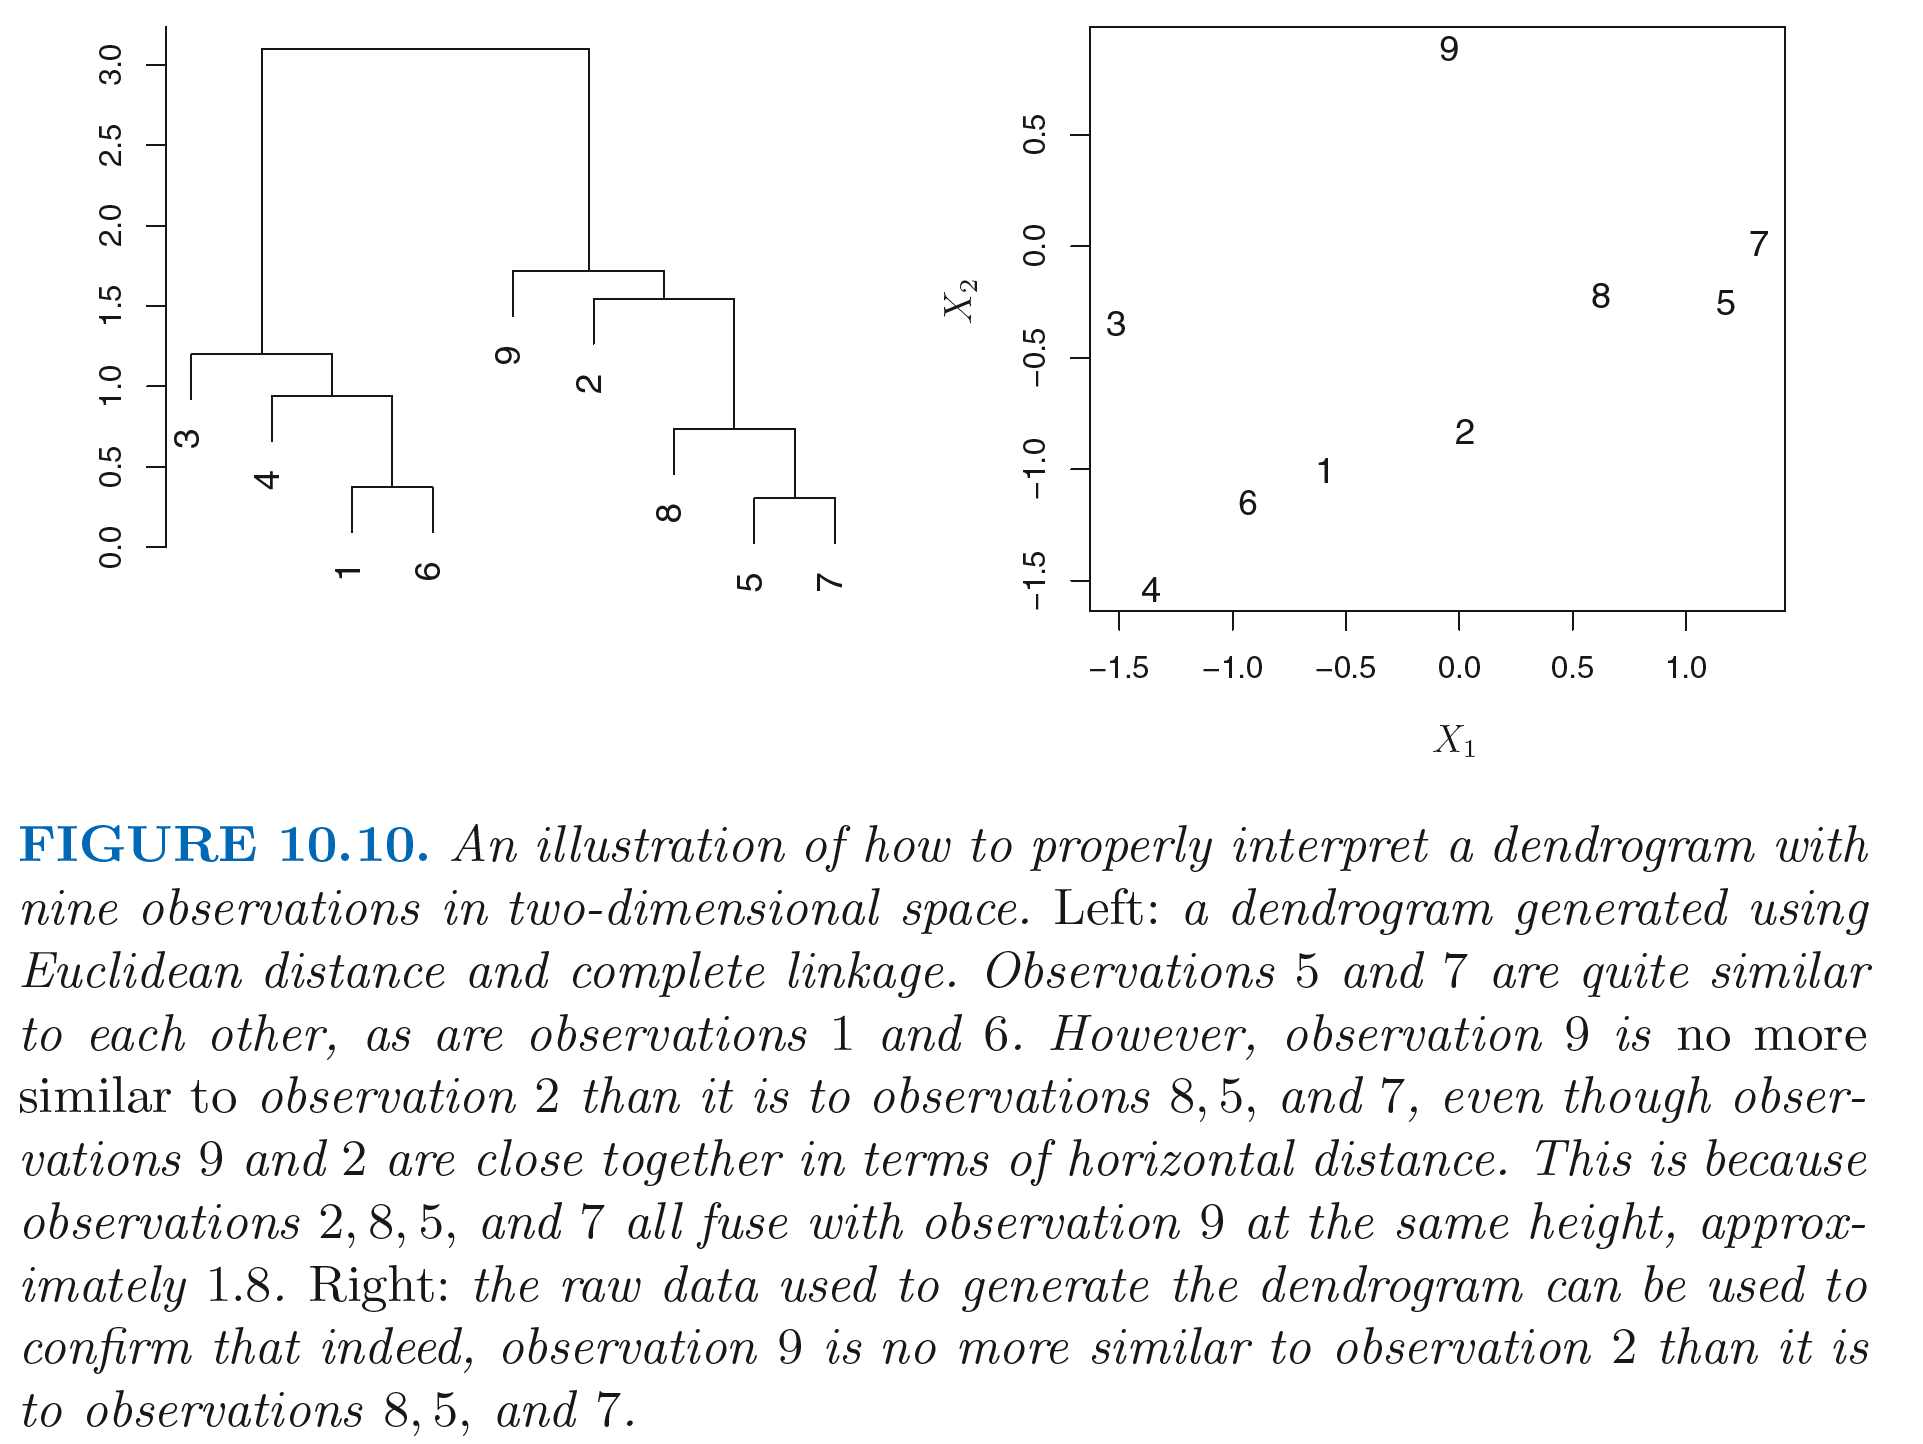

In [ ]:
Image('pw106.PNG', width =700)

#### Hierarchical Clustering Algorithm 层次聚类算法
1. Starting out at the bottom of the dendrogram, each of the n observations is treated as its own cluster.
2. The two clusters that are most similar to each other are then fused so that there now are n−1 clusters.
3. The dissimilarity between these two clusters indicates the height in the dendrogram at which the fusion should be placed.
4. Compute the new pairwise inter-cluster dissimilarities among the n − 1 remaining clusters.
5. Repeat steps 2 - 4 until only 1 cluster left.


1. 从树状图的底部开始，将 n 个观测值中的每一个视为其自己的聚类。
2. 然后将最相似的两个聚类融合，这样现在就有 n-1 个聚类。
3. 这两个聚类之间的差异表示应在树状图中将融合置于的高度。
4. 计算剩余的 n-1 个聚类之间的新的成对聚类间差异。
5. 重复步骤 2 - 4，直到只剩下 1 个聚类。

##### Notes
+ The dissimilarity is the height of the dendogram.
+ Dissimilarity is calculated through a type of **linkage** and distance metric (usually euclidean).


+ 相异度是树状图的高度。
+ 相异度是通过一种**链接**和距离度量（通常是欧几里得）来计算的。


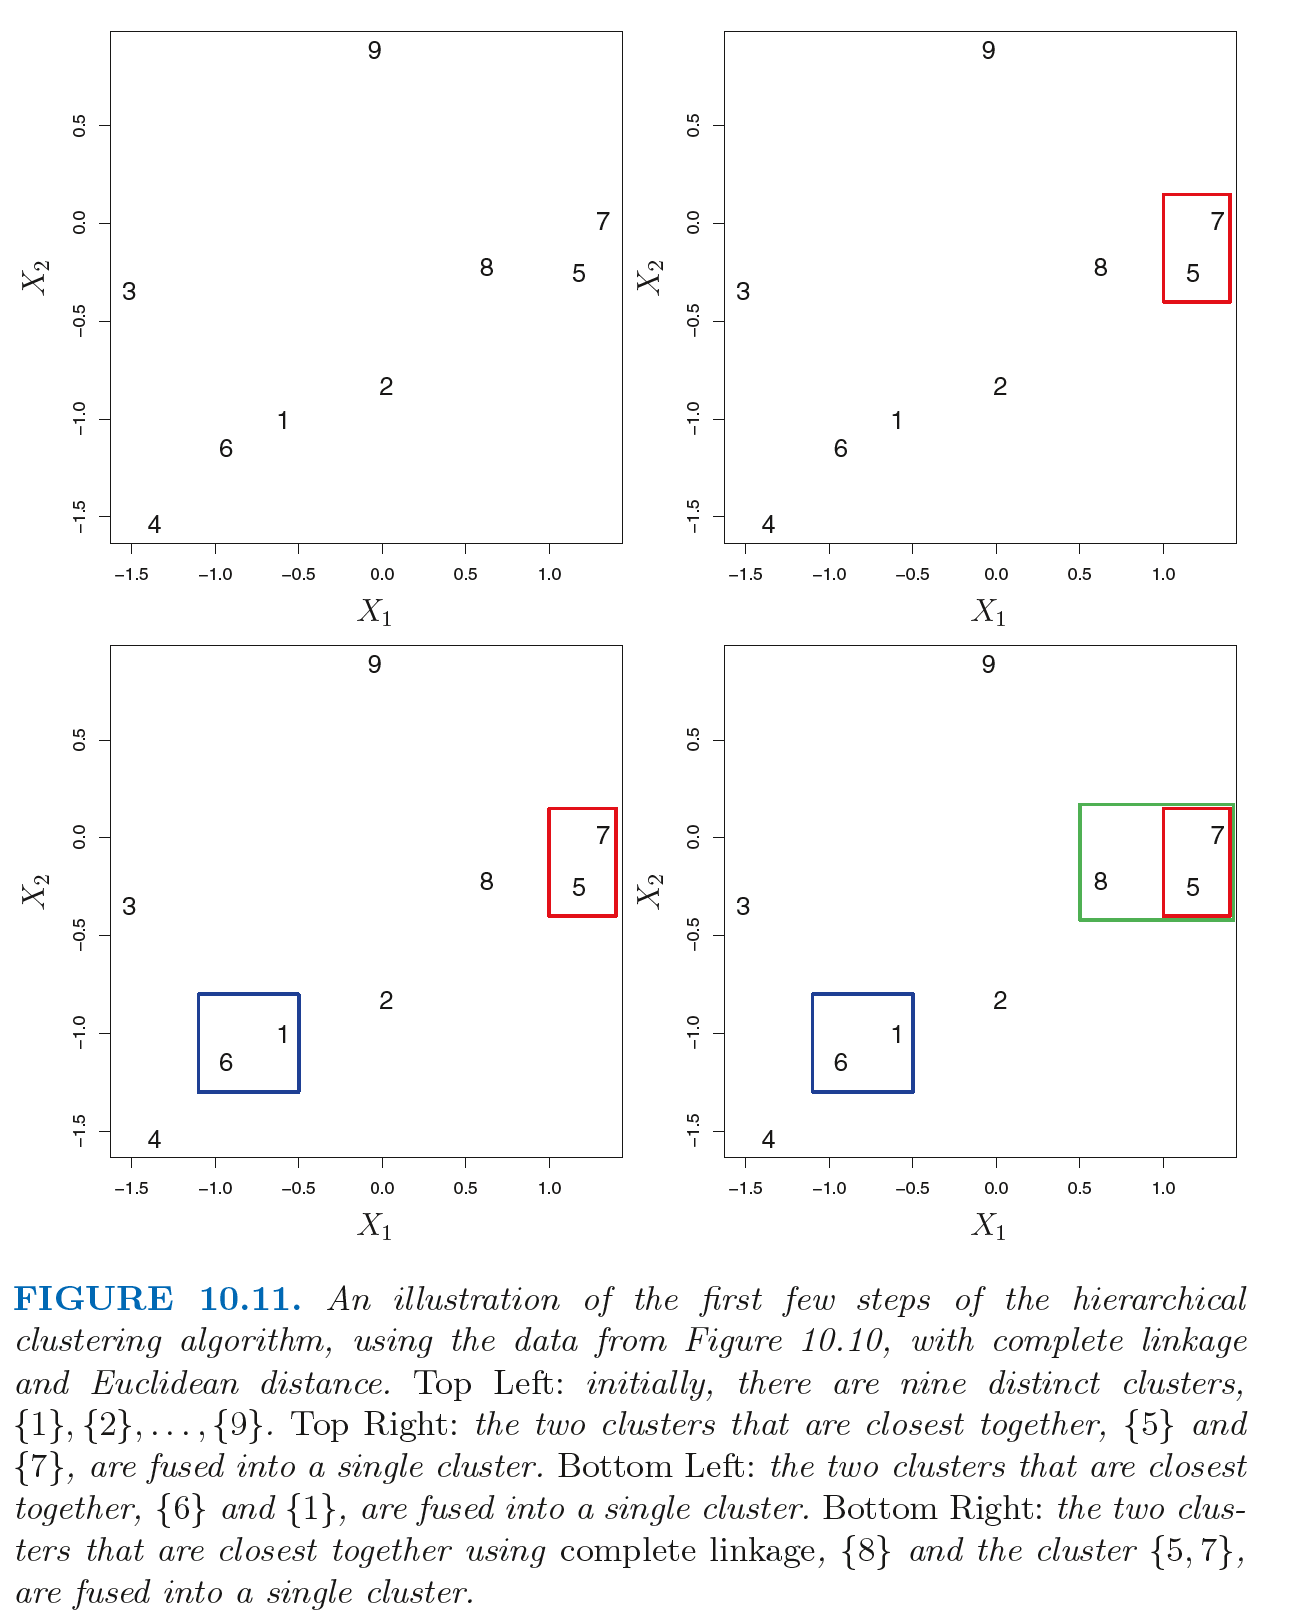

In [ ]:
Image('pw107.PNG', width =700)

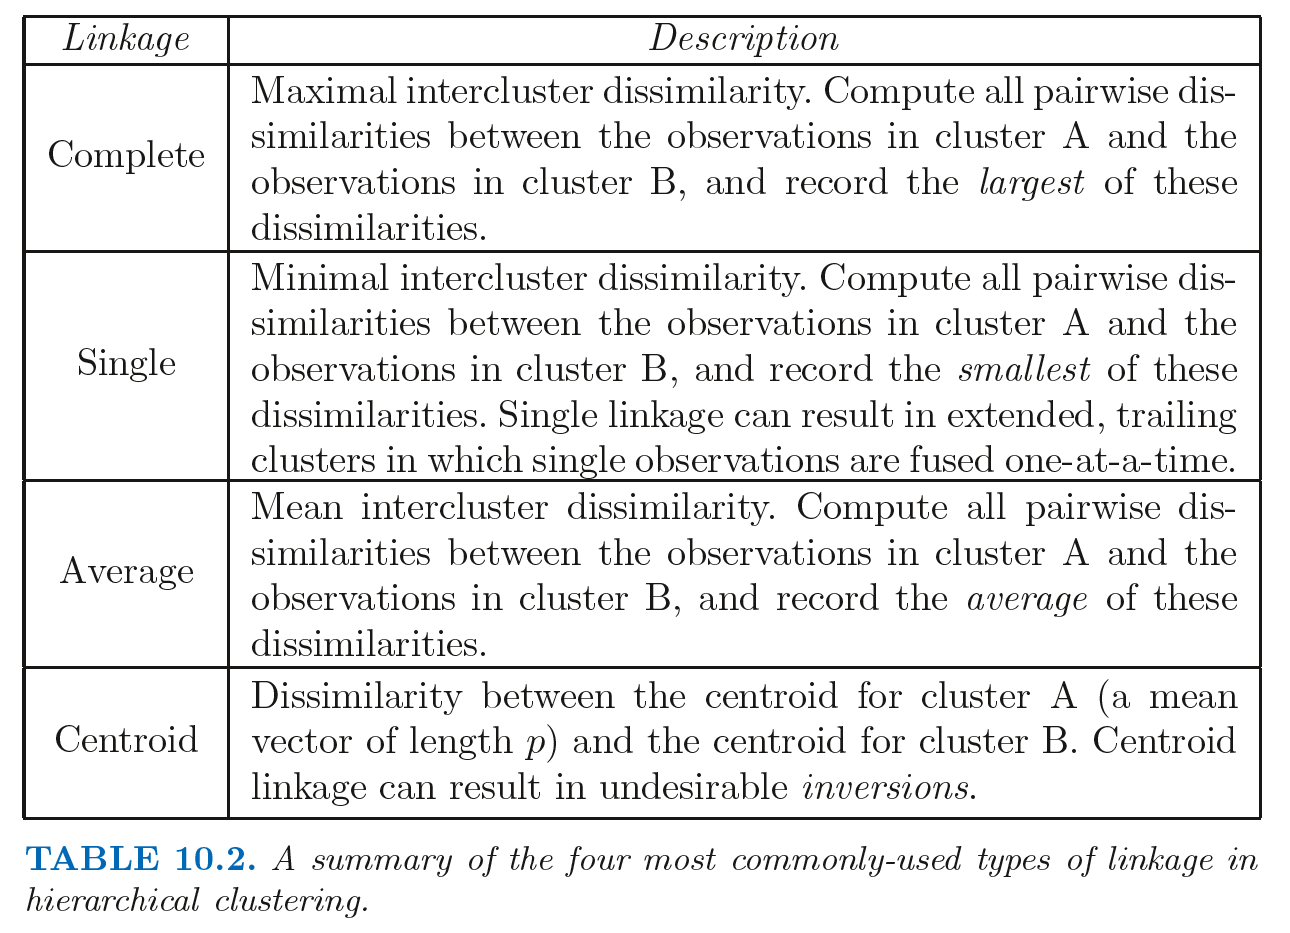

In [ ]:
Image('pw108.PNG', width =700)

![image.png](attachment:image.png)

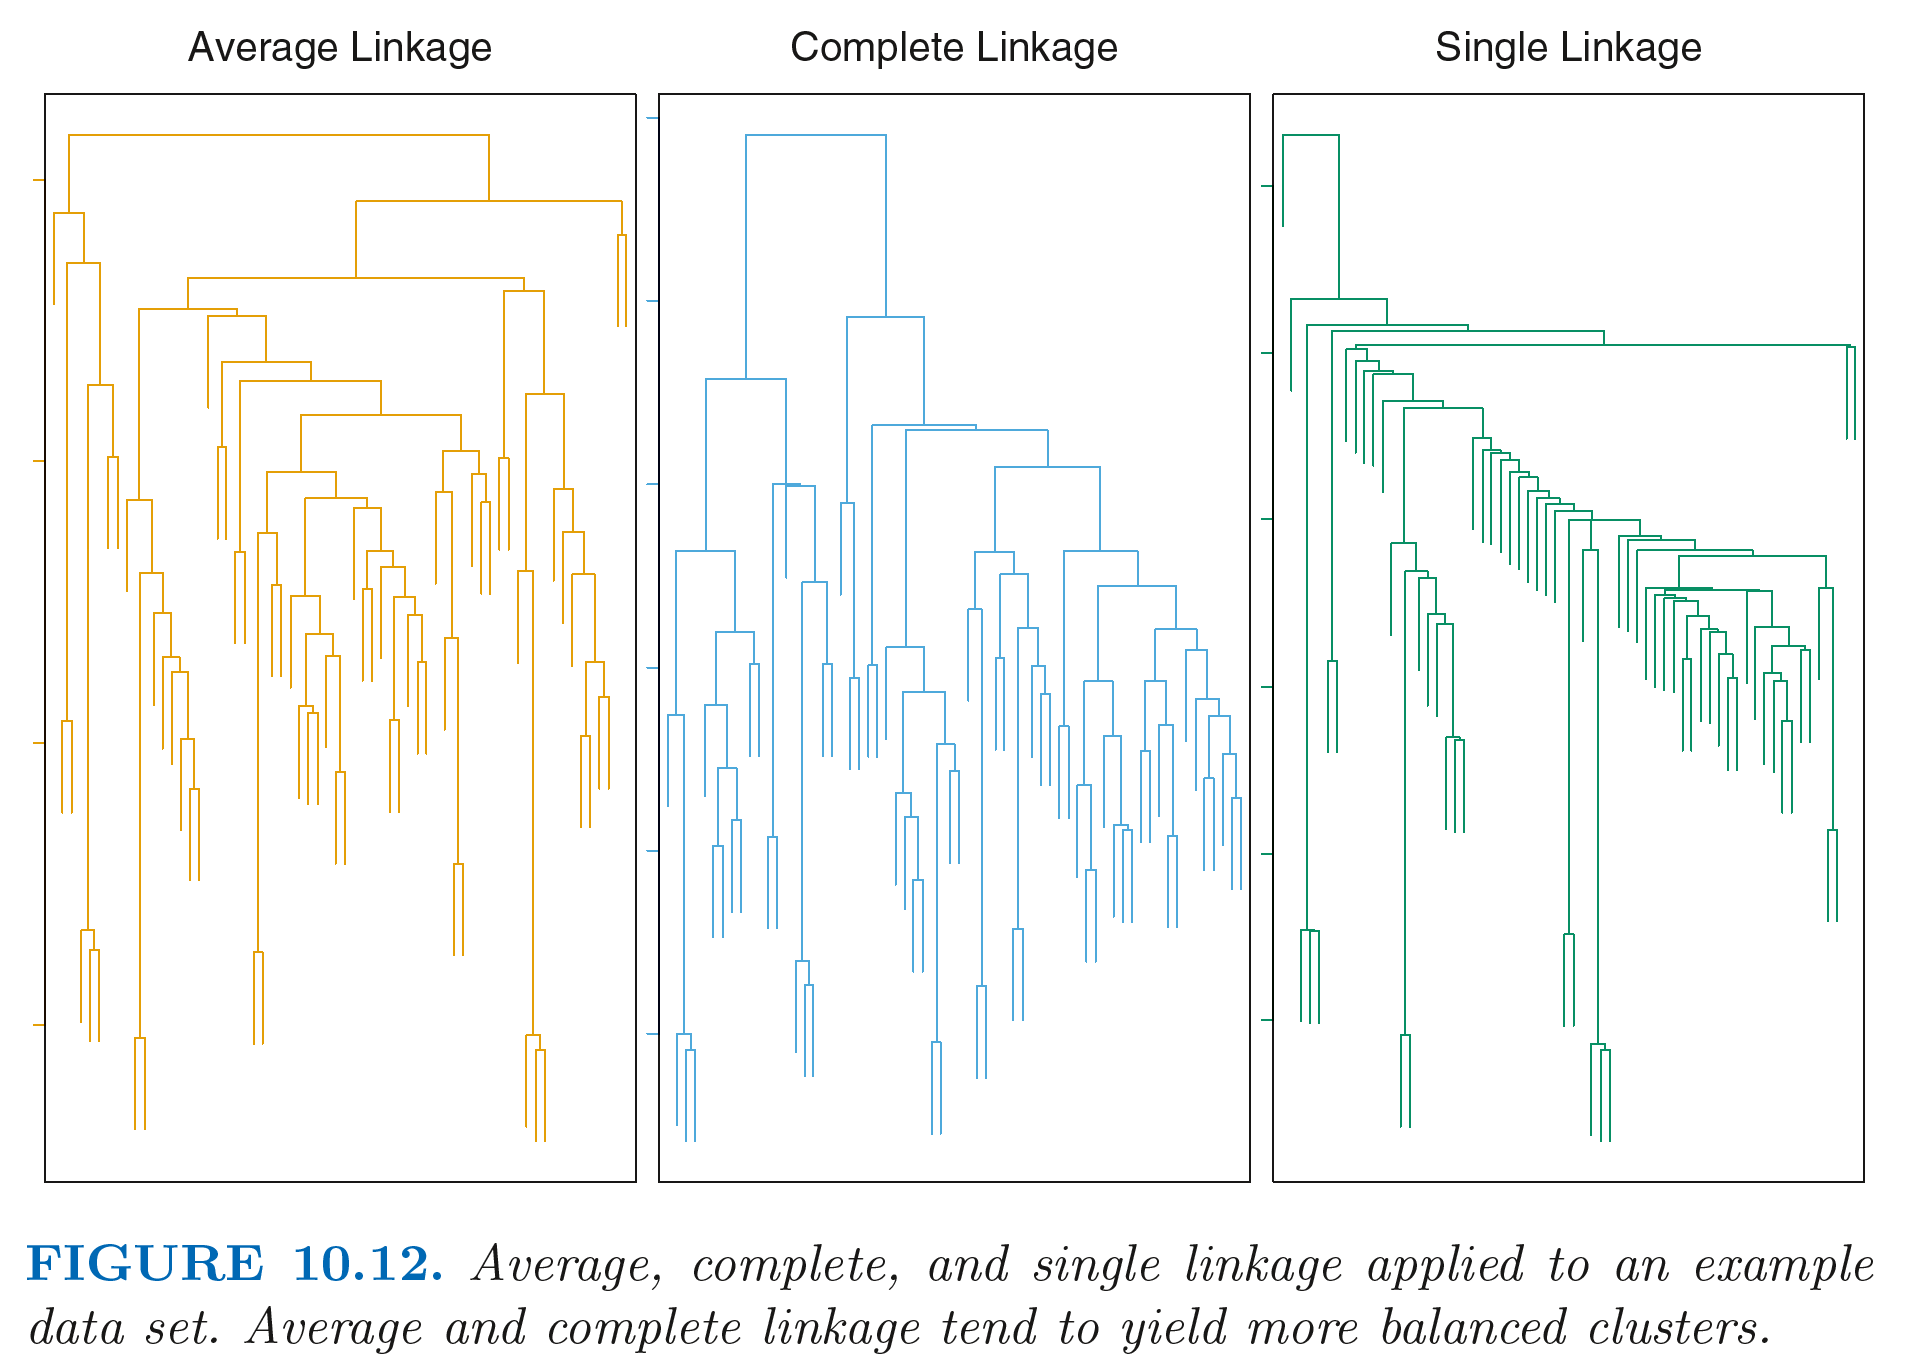

In [ ]:
Image('pw109.PNG', width =700)

#### Choice of Dissimilarity Measure 差异度量的选择

+ Other than Euclidean distance, correlation-based distance can be used, where two observations are similar if their features are highly correlated, even though the observed values may be far apart in terms of Euclidean distance.
+ The variables should be considered whether to be scaled or not before the dissimilarity between the observations is computed.


+ 除了欧几里得距离，还可以使用基于相关性的距离，如果两个观测值的特征高度相关，则它们是相似的，即使观测值在欧几里得距离方面可能相距甚远。
+ 在计算观测值之间的差异之前，应该考虑变量是否需要缩放。

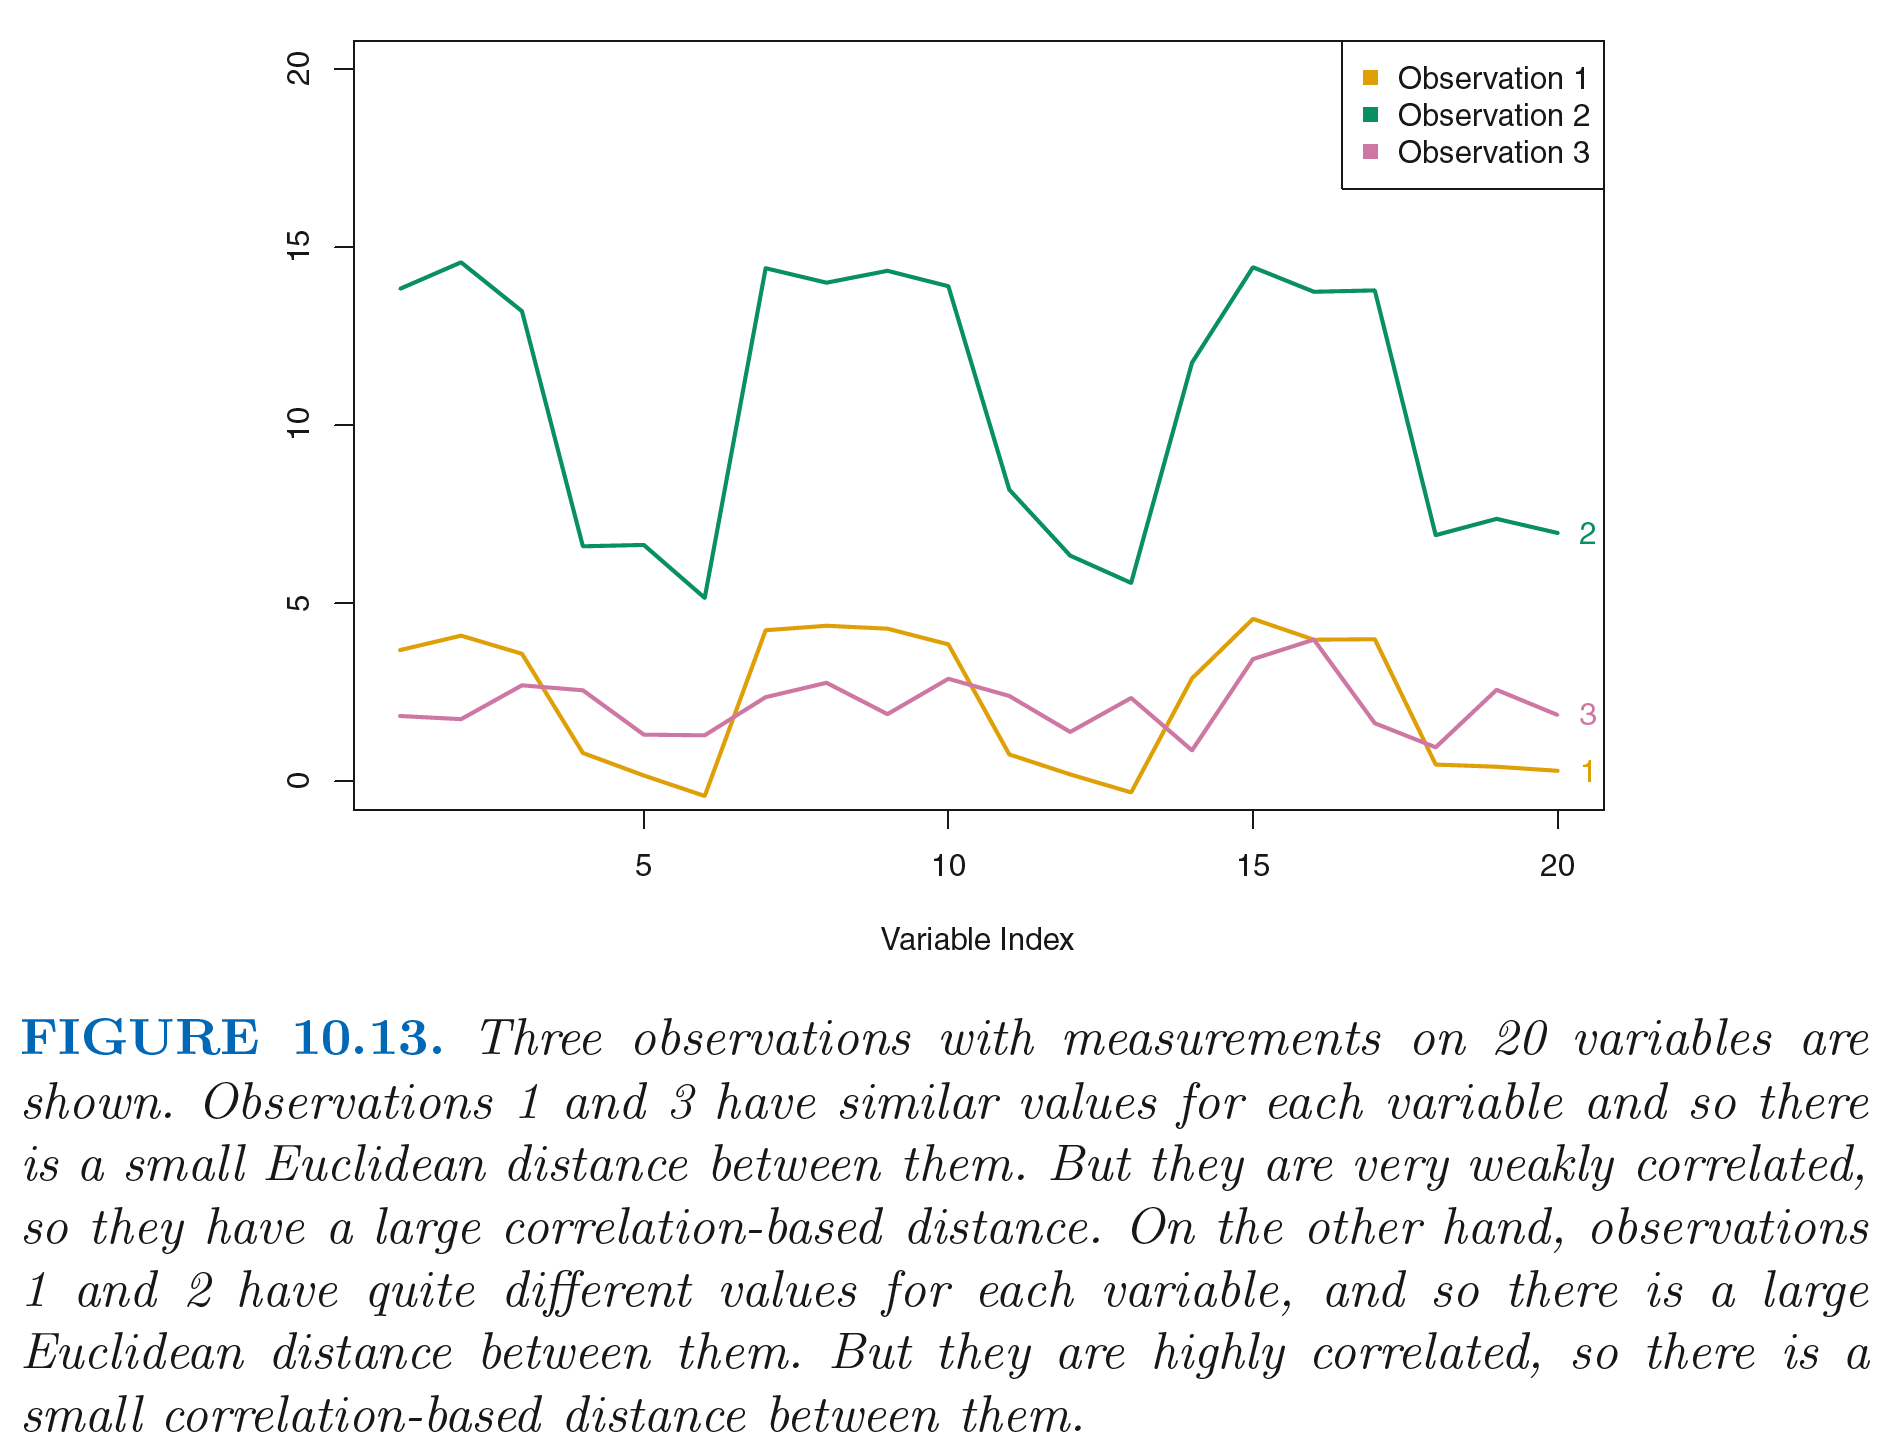

In [ ]:
Image('pw1010.PNG', width =700)

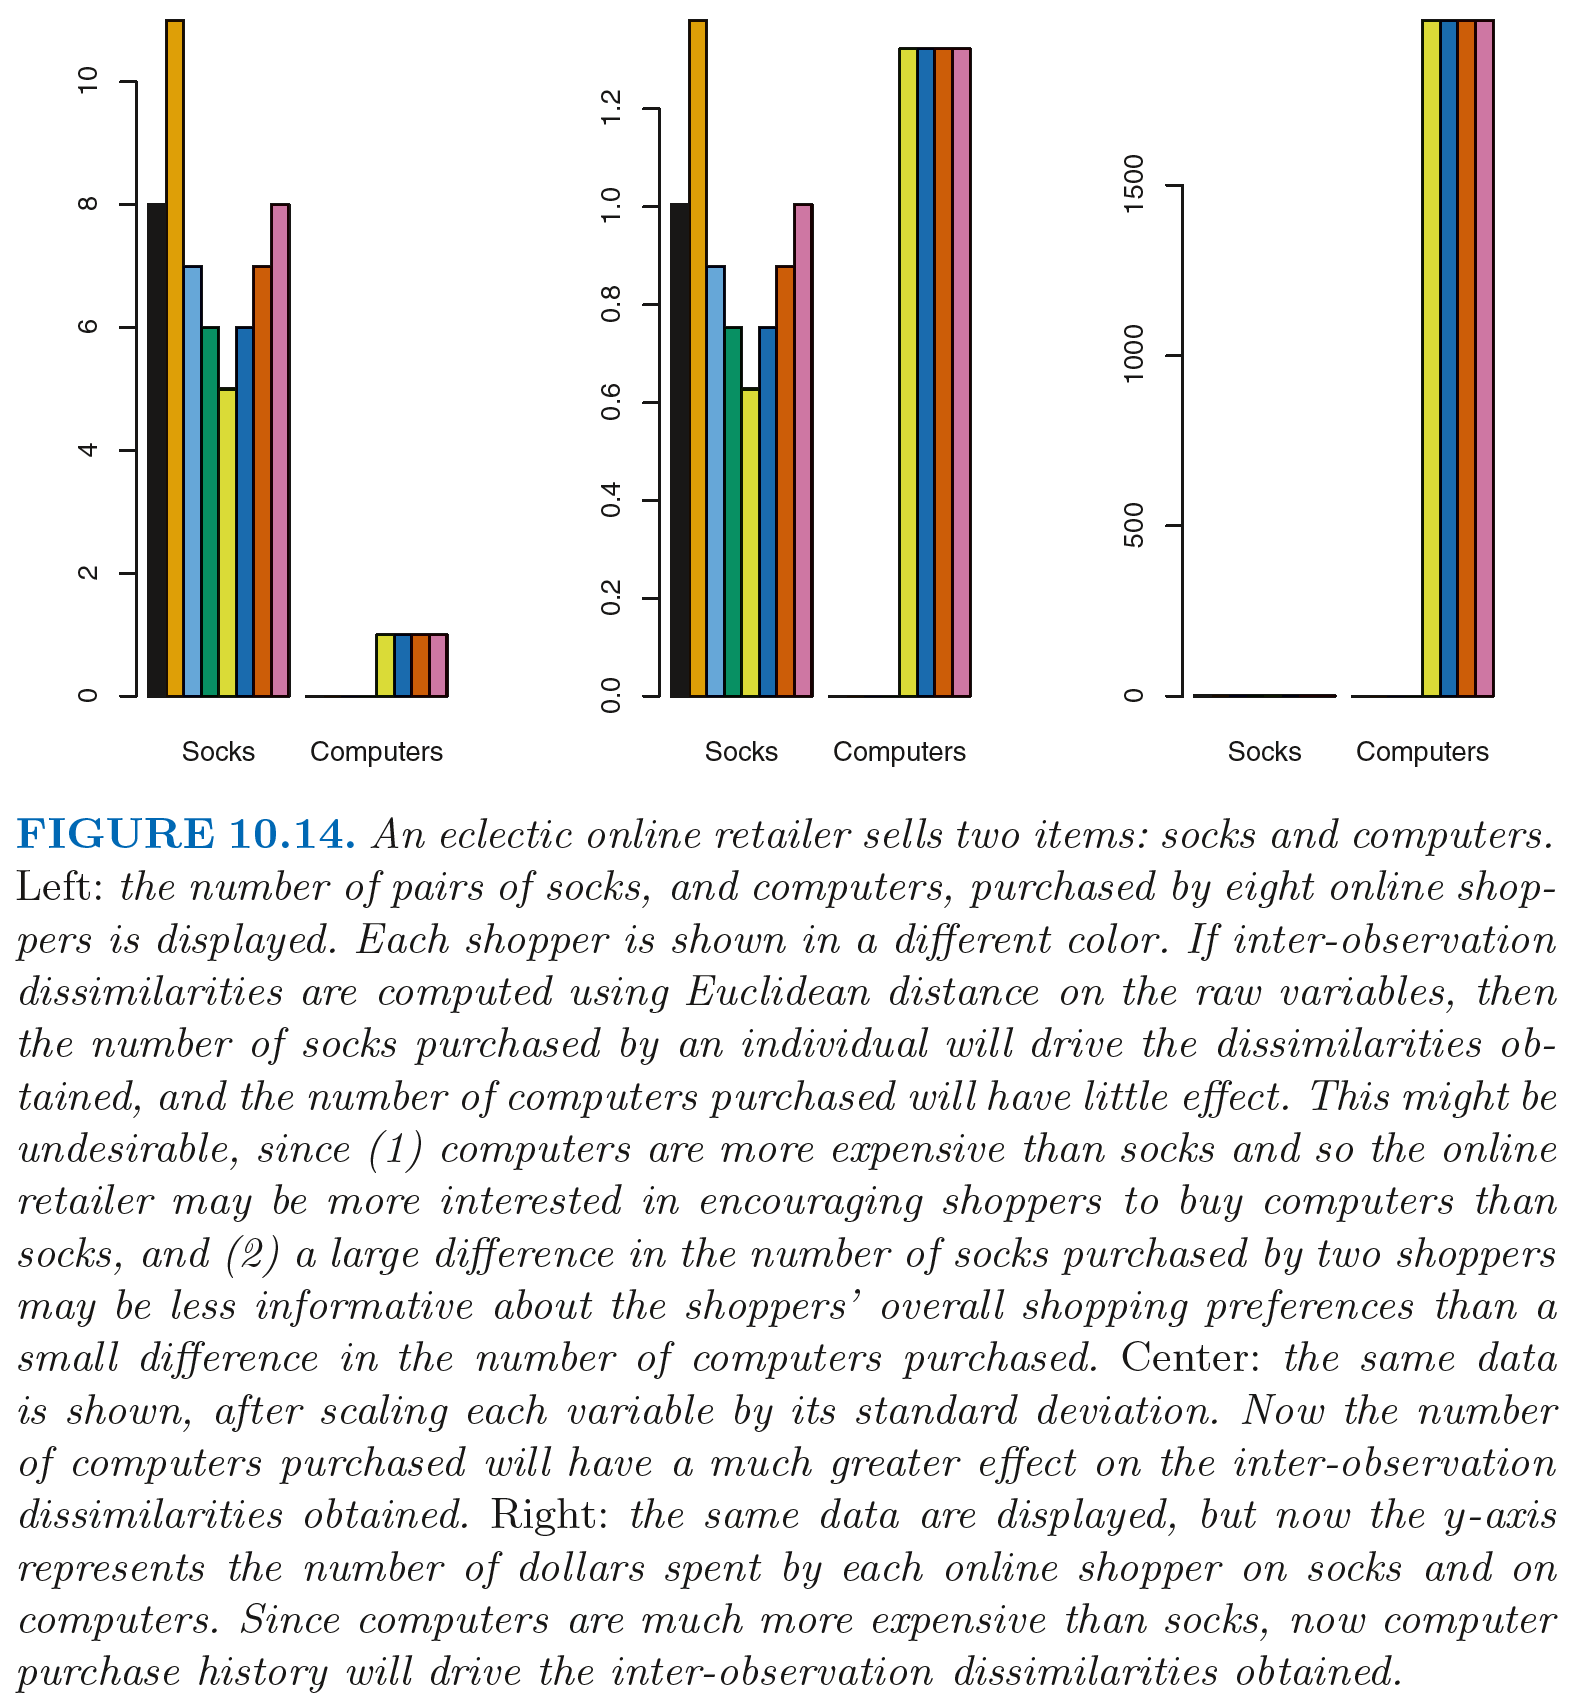

In [ ]:
Image('pw1011.PNG', width =700)

### Lab
+ Use the data from the previous section to plot the hierarchical clustering dendrogram using complete, single, and average linkage clustering, with Euclidean distance as the dissimilarity measure.
+ We begin by clustering observations using complete linkage:


+ 使用上一节中的数据，使用完整、单一和平均链接聚类绘制层次聚类树状图，以欧几里得距离作为相异度度量。
+ 我们首先使用完整链接对观测值进行聚类：

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
X = np.random.randn(50,2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

In [ ]:
from scipy.cluster.hierarchy import linkage

hc_complete = linkage(X, "complete")

+ We could just as easily perform hierarchical clustering with average or single linkage instead:

+ 我们可以很容易地使用平均或单一链接执行层次聚类：

In [ ]:
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

We can now plot the dendrograms obtained using the usual `dendrogram()` function.
The numbers at the bottom of the plot identify each observation:


我们现在可以使用常用的 `dendrogram()` 函数绘制获得的树状图。
图底部的数字标识每个观察结果：

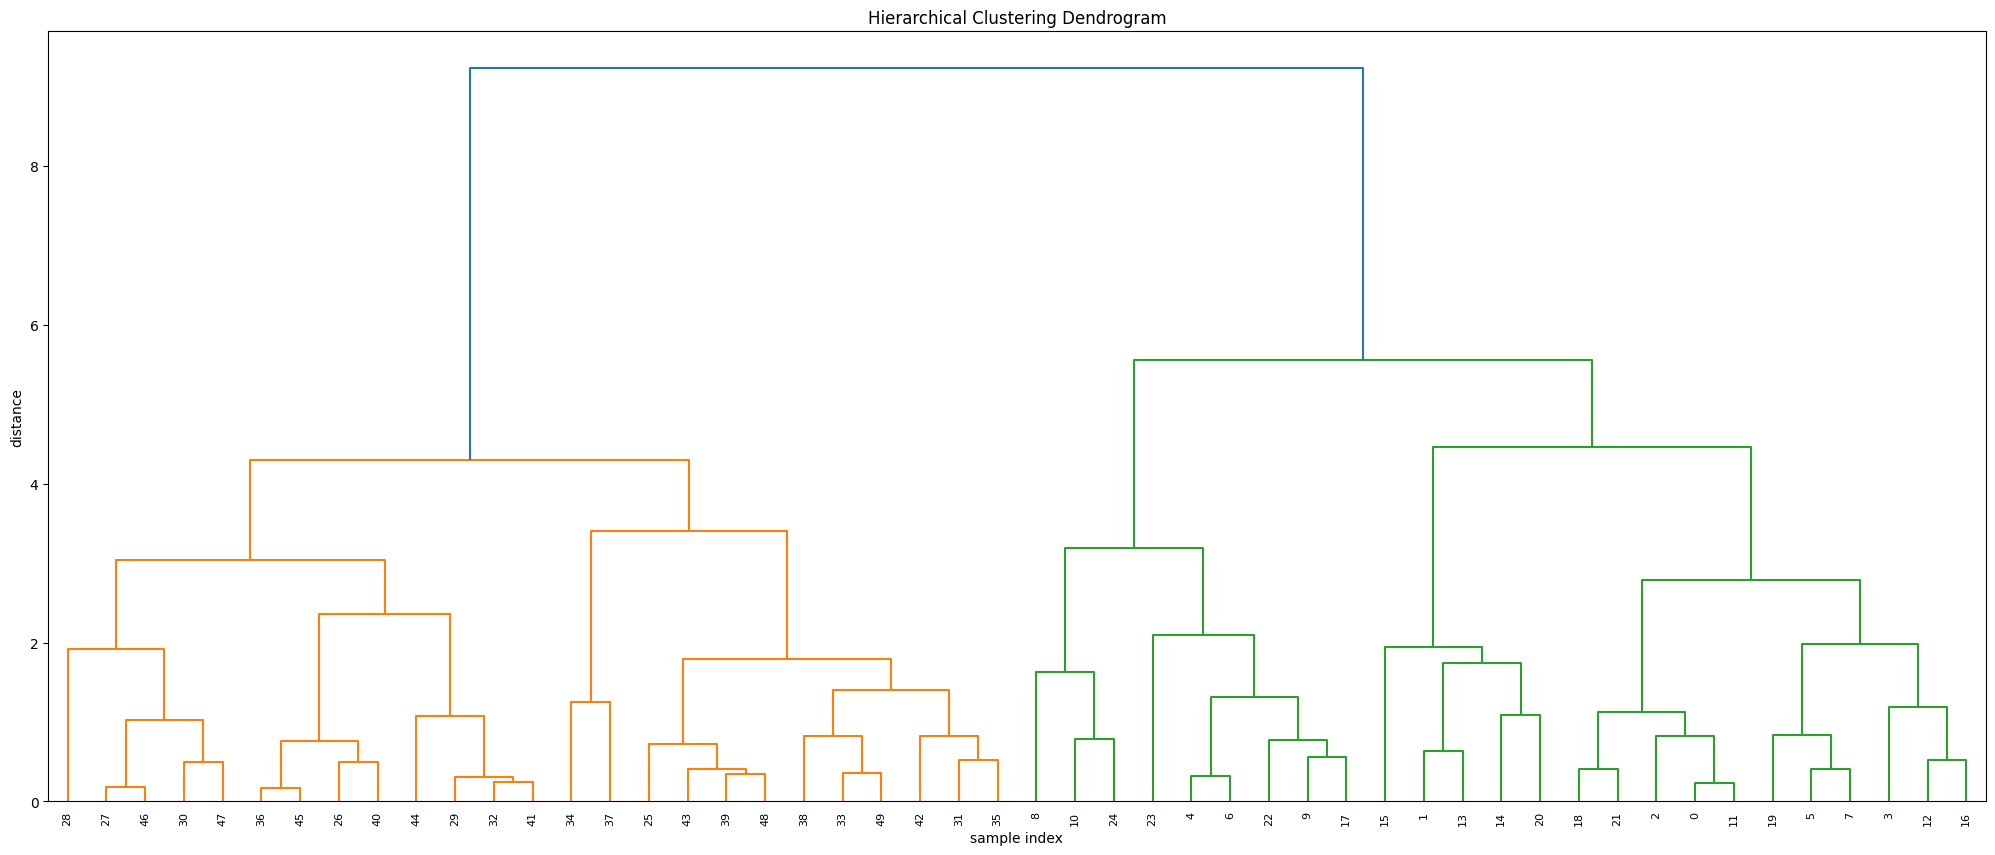

In [ ]:
from scipy.cluster.hierarchy import dendrogram

# calculate full dendrogram 计算完整树状图
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')#层次聚类树状图
plt.xlabel('sample index')#样本索引
plt.ylabel('distance')#距离
dendrogram(
    hc_complete,
    leaf_rotation=90.,  # rotates the x axis labels 旋转 x 轴标签
    leaf_font_size=8.,  # font size for the x axis labels x 轴标签的字体大小
)
plt.show()

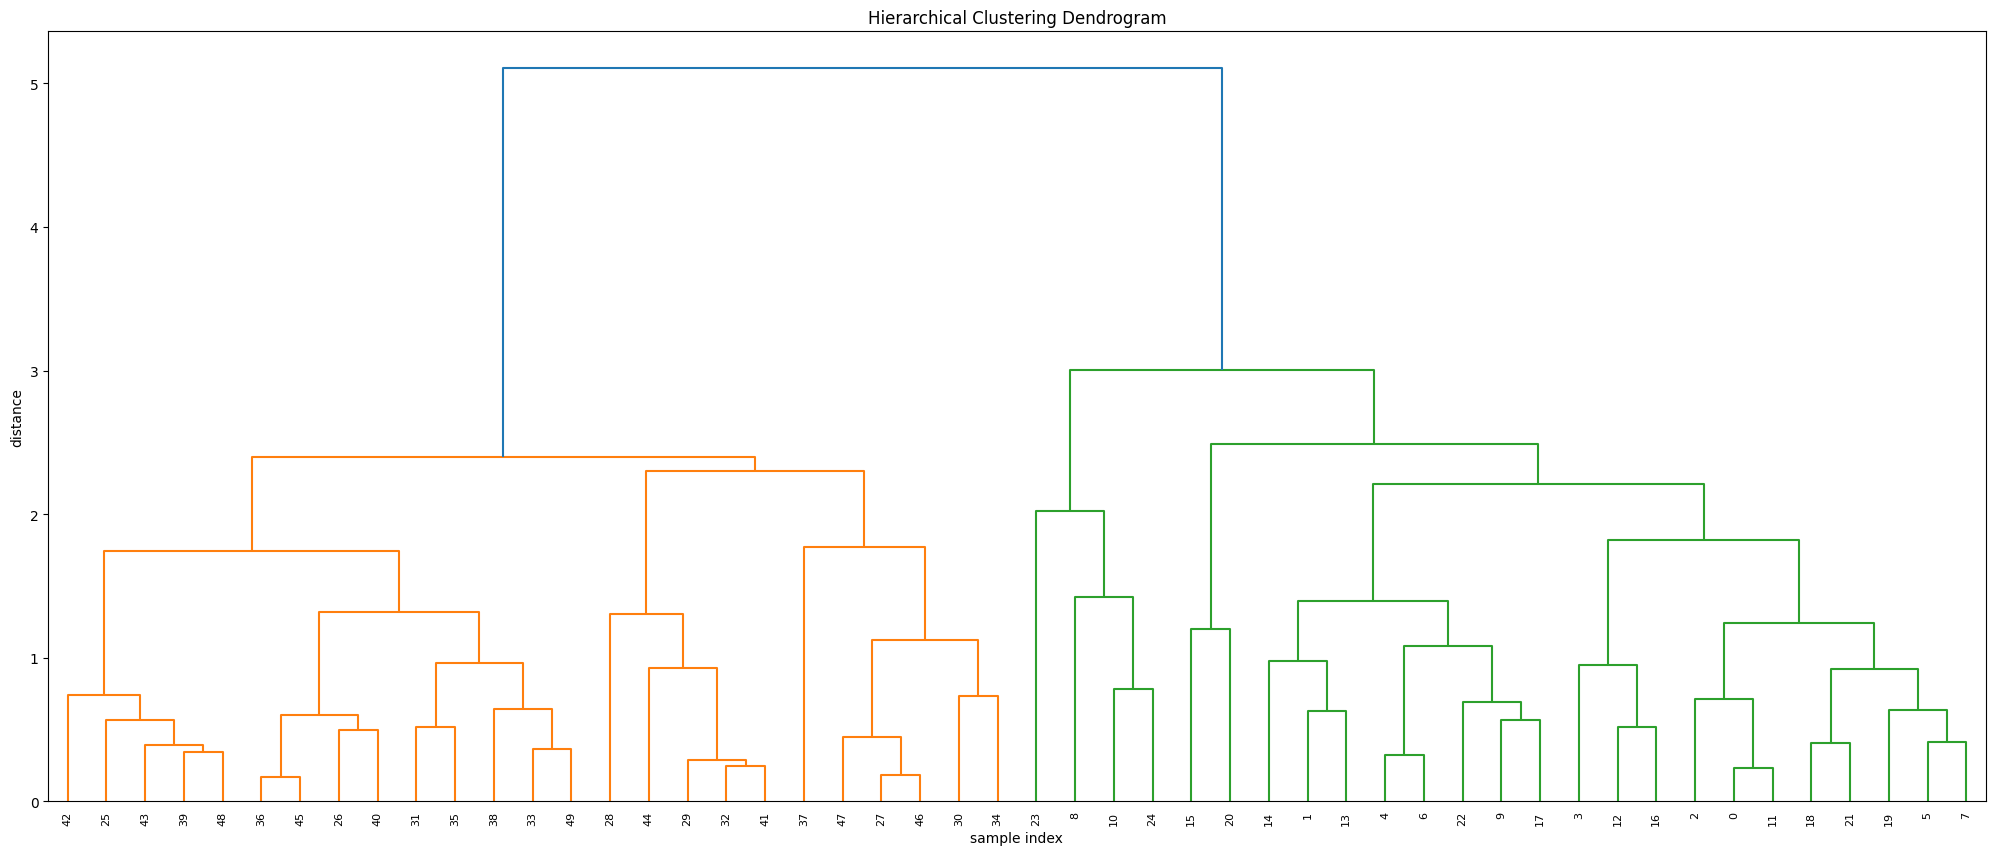

In [ ]:
# calculate full dendrogram 计算完整树状图
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_average,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

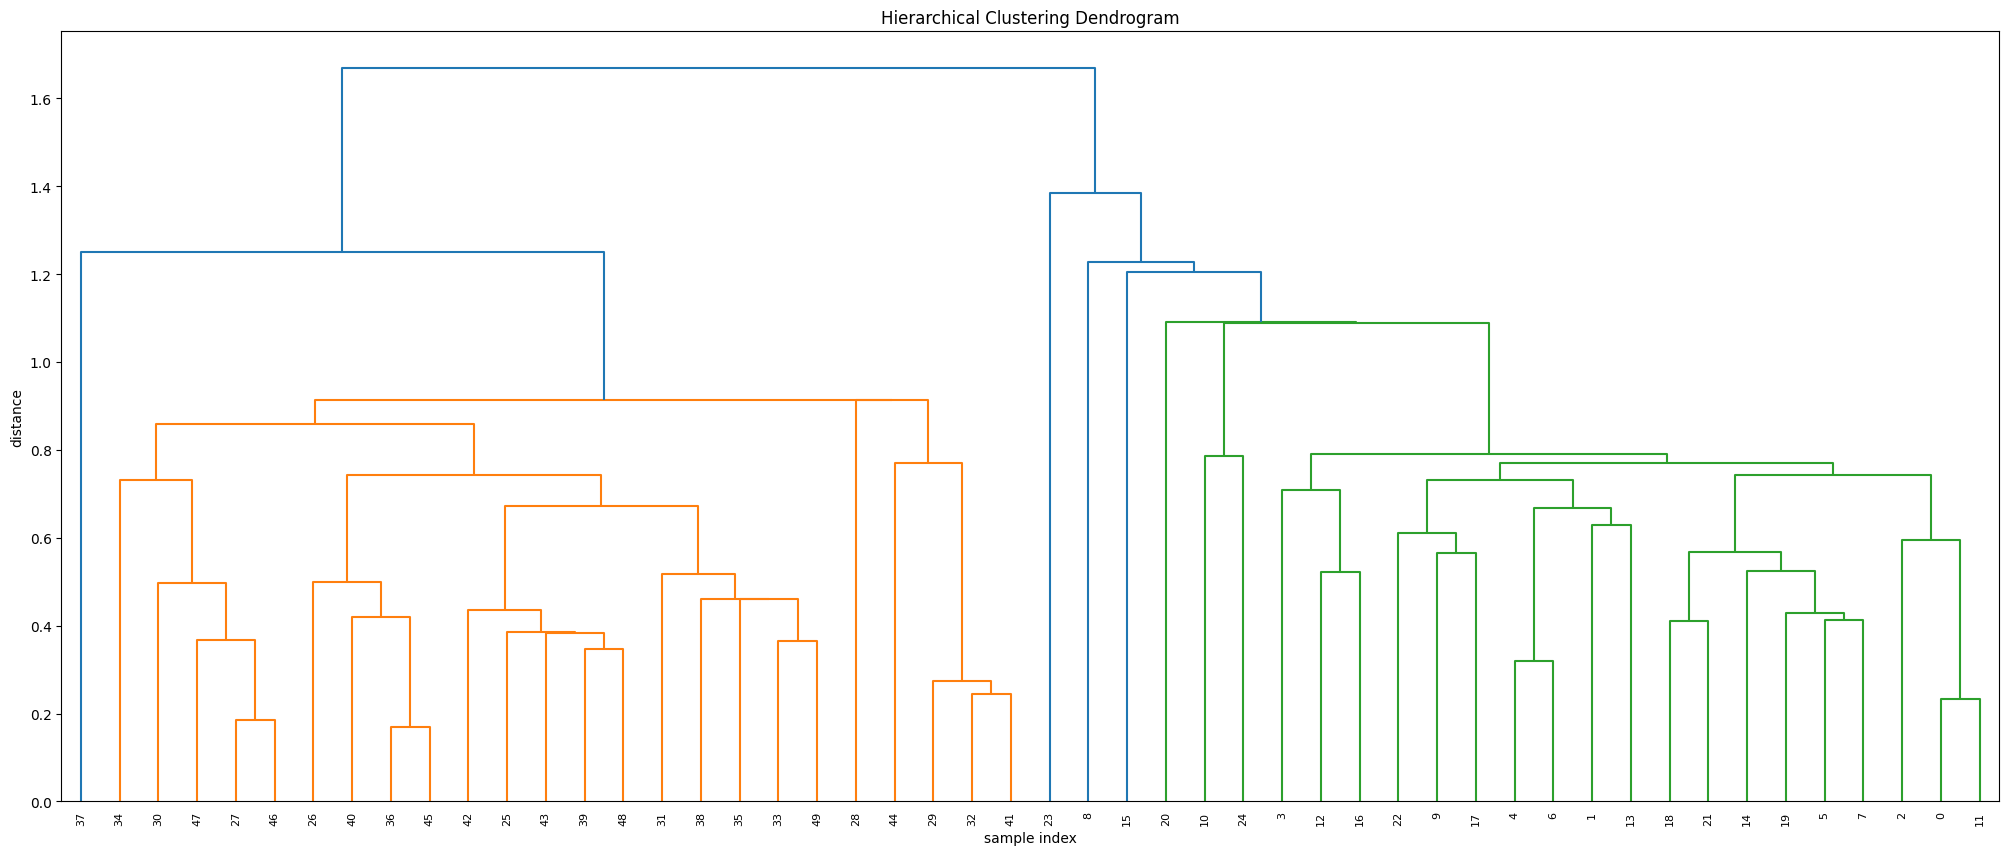

In [ ]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_single,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

To determine the cluster labels for each observation associated with a
given cut of the dendrogram, we can use the `cut_tree()` function:


为了确定与树状图的给定部分相关的每个观测值的聚类标签，我们可以使用 `cut_tree()` 函数：

In [ ]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(hc_single, n_clusters = 2).T) # Printing transpose just for space 打印转置只是为了空间

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


For this data, complete and average linkage generally separates the observations
into their correct groups.

对于这些数据，完整和平均链接通常会将观测值分成正确的组。

### NCI60 Data Example

+ How hierarchical and K-means clustering compare on the `NCI60` cancer cell line microarray data, which consists of 6,830 gene expression measurements on 64 cancer cell lines:


+ 层次聚类和 K 均值聚类在 `NCI60` 癌细胞系微阵列数据上的比较情况，该数据包含 64 种癌细胞系的 6,830 个基因表达测量值：

In [ ]:
# The NCI60 data
nci_labs = pd.read_csv("nci60_labs.csv", index_col = 0)
nci_data = pd.read_csv("nci60_data.csv", index_col = 0)

+ Each cell line is labeled with a cancer type.
+ We'll ignore the
cancer types in performing clustering, as these are unsupervised
techniques.
+ After performing clustering, we'll use this column to see the extent to which these cancer types agree with the results of these
unsupervised techniques.

+ The data has 64 rows and 6,830 columns.


+ 每个细胞系都标有一种癌症类型。
+ 在执行聚类时，我们将忽略癌症类型，因为这些是无监督技术。
+ 执行聚类后，我们将使用此列来查看这些癌症类型与这些无监督技术的结果的一致程度。

+ 数据有 64 行和 6,830 列。

In [ ]:
nci_data.shape

(64, 6830)

In [ ]:
nci_labs.x.value_counts(sort=True)

x
RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
UNKNOWN        1
K562B-repro    1
K562A-repro    1
MCF7A-repro    1
MCF7D-repro    1
Name: count, dtype: int64

In [ ]:
nci_data.head(5)

1         2         3         4         5             6         7  \
V1  0.300000  1.180000  0.550000  1.140000 -0.265000 -7.000000e-02  0.350000   
V2  0.679961  1.289961  0.169961  0.379961  0.464961  5.799610e-01  0.699961   
V3  0.940000 -0.040000 -0.170000 -0.040000 -0.605000  0.000000e+00  0.090000   
V4  0.280000 -0.310000  0.680000 -0.810000  0.625000 -1.387779e-17  0.170000   
V5  0.485000 -0.465000  0.395000  0.905000  0.200000 -5.000000e-03  0.085000   

           8         9        10  ...      6821      6822      6823      6824  \
V1 -0.315000 -0.450000 -0.654980  ... -0.990020  0.000000  0.030000 -0.175000   
V2  0.724961 -0.040039 -0.285019  ... -0.270058 -0.300039 -0.250039 -0.535039   
V3  0.645000  0.430000  0.475019  ...  0.319981  0.120000 -0.740000 -0.595000   
V4  0.245000  0.020000  0.095019  ... -1.240020 -0.110000 -0.160000  0.095000   
V5  0.110000  0.235000  1.490019  ...  0.554980 -0.775000 -0.515000 -0.320000   

        6825      6826      6827      6828      6829      6830  
V1  0.629981 -0.030000  0.000000  0.280000 -0.340000 -1.930000  
V2  0.109941 -0.860039 -1.250049 -0.770039 -0.390039 -2.000039  
V3 -0.270020 -0.150000  0.000000 -0.120000 -0.410000  0.000000  
V4 -0.350019 -0.300000 -1.150010  1.090000 -0.260000 -1.100000  
V5  0.634980  0.605000  0.000000  0.745000  0.425000  0.145000  

[5 rows x 6830 columns]

In [ ]:
nci_labs

x
1        CNS
2        CNS
3        CNS
4      RENAL
5     BREAST
..       ...
60  MELANOMA
61  MELANOMA
62  MELANOMA
63  MELANOMA
64  MELANOMA

[64 rows x 1 columns]

+ We now perform hierarchical clustering of the observations using complete,
single, and average linkage.
+ We'll use standard Euclidean distance as the dissimilarity
measure:


+ 我们现在使用完整、
单一和平均链接对观测值进行层次聚类。
+ 我们将使用标准欧几里得距离作为差异性
度量：

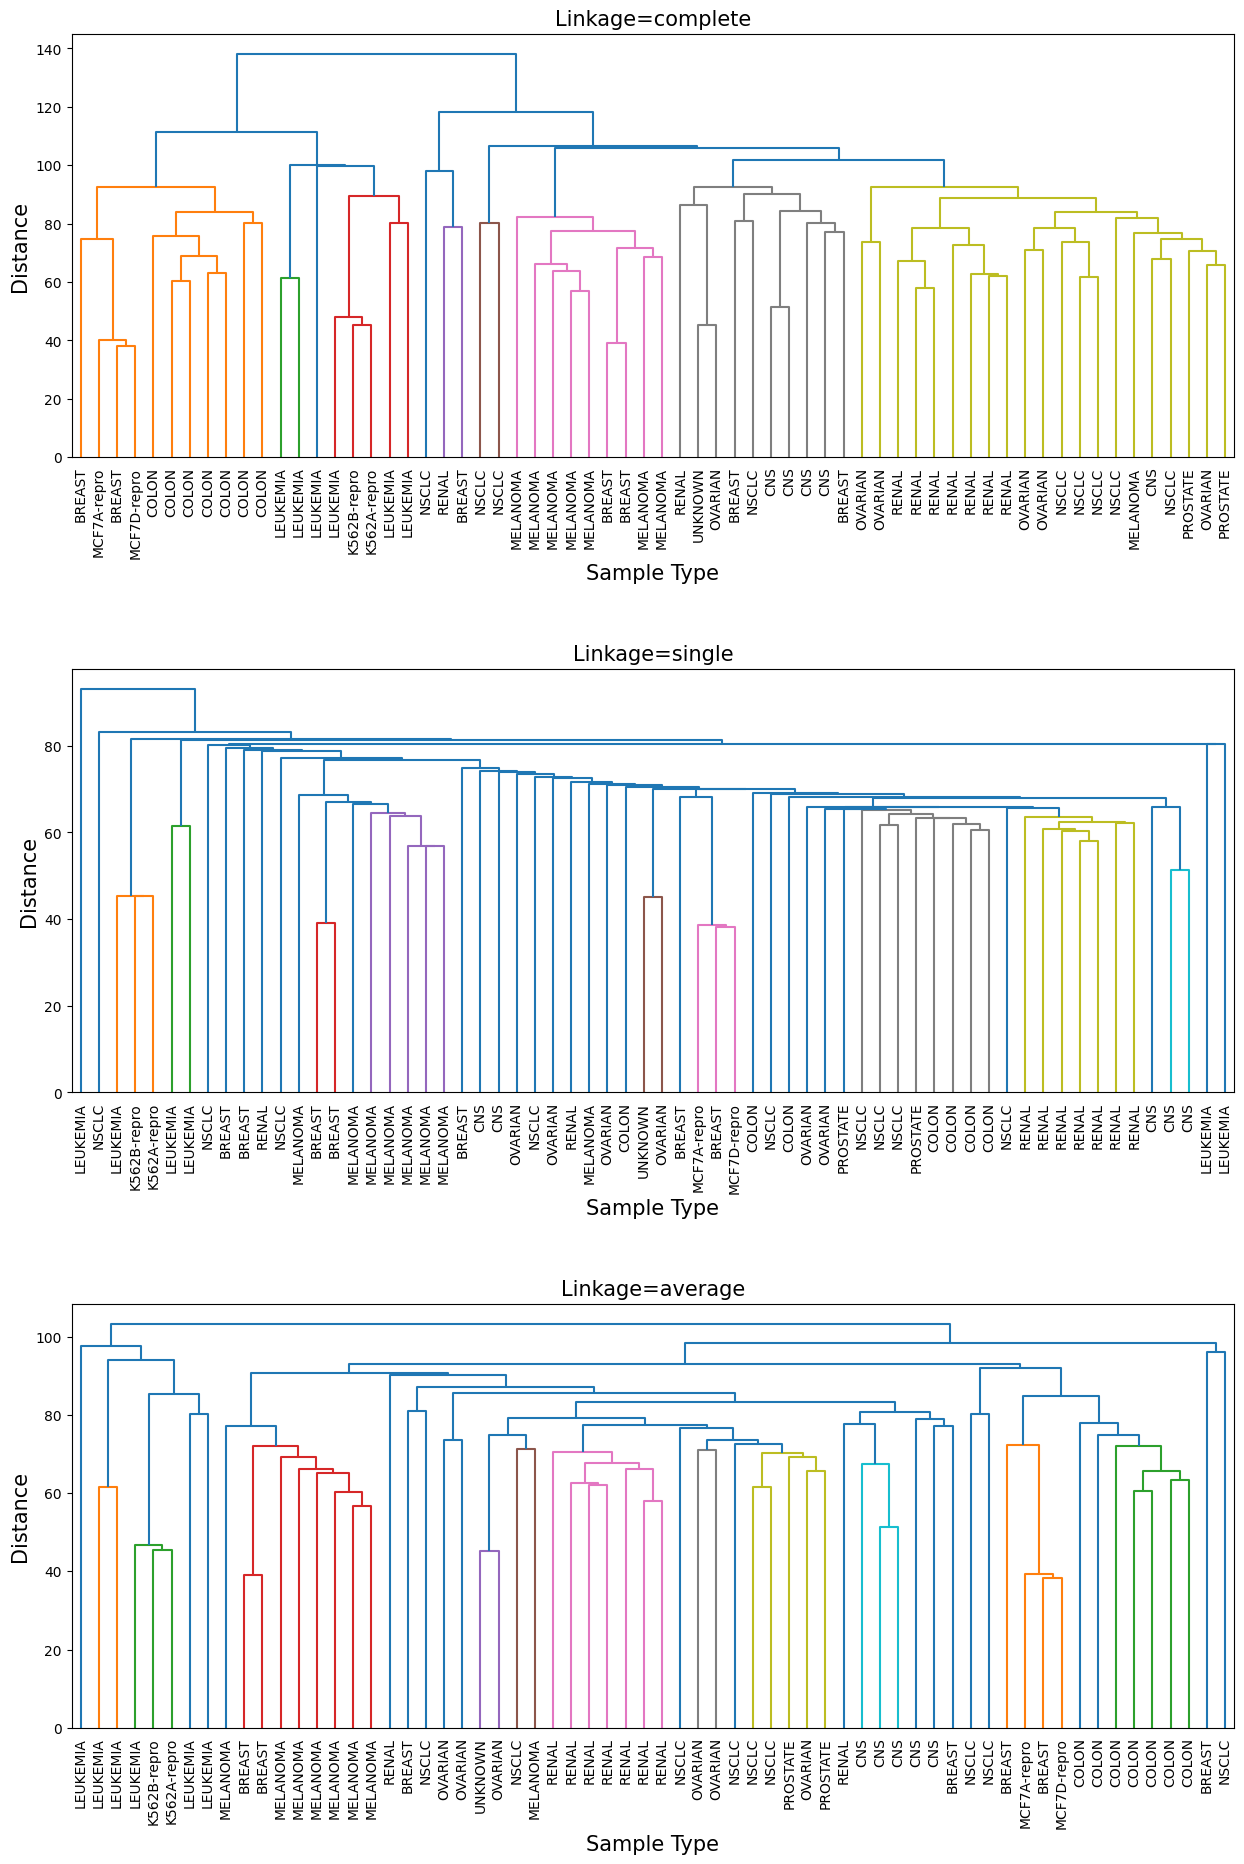

In [ ]:
nci_data.index = nci_labs.x

fig, ax = plt.subplots(3,1, figsize=(15,22))
fig.subplots_adjust(hspace=0.5)

linkages = ['complete', 'single', 'average']
for link, axis in zip(linkages, fig.axes):
    hc = linkage(y = nci_data, method=link, metric='euclidean')
    axis.set_title("Linkage=%s" % link, size=15)
    axis.set_xlabel('Sample Type', size=15)
    axis.set_ylabel('Distance', size=15)
    dendrogram(hc, ax=axis, labels=nci_data.index, leaf_rotation=90, leaf_font_size=10)

+ We see that the choice of linkage
certainly does affect the results obtained.
+ Typically, single linkage will tend
to yield trailing clusters: very large clusters onto which individual observations
attach one-by-one.
+ On the other hand, complete and average linkage
tend to yield more balanced, attractive clusters.
+ For this reason, complete
and average linkage are generally preferred to single linkage.
+ Clearly cell
lines within a single cancer type do tend to cluster together, although the
clustering is not perfect.

+ Let's use our complete linkage hierarchical clustering
for the analysis.
+ We can cut the dendrogram at the height that will yield a particular
number of clusters, say 4:


+ 我们看到，链接的选择

确实会影响获得的结果。

+ 通常，单一链接倾向于

产生尾随簇：非常大的簇，各个观察值

逐一附加到这些簇上。

+ 另一方面，完整和平均链接

倾向于产生更平衡、更有吸引力的簇。

+ 因此，完整和平均链接通常优于单一链接。

+ 显然，单一癌症类型内的细胞

系确实倾向于聚集在一起，尽管这种聚类并不完美。

+ 让我们使用完整链接层次聚类

进行分析。

+ 我们可以在将产生特定数量的簇（例如 4）的高度处切割树状图：

In [ ]:
nci_hc_complete = linkage(y = nci_data, method="complete", metric='euclidean')

nci_hc_complete_4_clusters = cut_tree(nci_hc_complete, n_clusters = 4) # Printing transpose just for space 打印转置只是为了空间

pd.crosstab(index = nci_data.index,
            columns = nci_hc_complete_4_clusters.T[0],
            rownames = ['Cancer Type'],
            colnames = ['Cluster'])

Cluster      0  1  2  3
Cancer Type            
BREAST       4  1  0  2
CNS          5  0  0  0
COLON        0  0  0  7
K562A-repro  0  0  1  0
K562B-repro  0  0  1  0
LEUKEMIA     0  0  6  0
MCF7A-repro  0  0  0  1
MCF7D-repro  0  0  0  1
MELANOMA     8  0  0  0
NSCLC        8  1  0  0
OVARIAN      6  0  0  0
PROSTATE     2  0  0  0
RENAL        8  1  0  0
UNKNOWN      1  0  0  0

+ There are some clear patterns. All the leukemia cell lines fall in cluster 2,
while the breast cancer cell lines are spread out over three different clusters.
+ We can plot the cut on the dendrogram that produces these four clusters by adding an `axhline()`, which draws a horizontal line on top of our plot:


+ 有一些明显的模式。所有白血病细胞系都属于第 2 个簇，
而乳腺癌细胞系则分布在三个不同的簇中。
+ 我们可以通过添加 `axhline()` 来绘制产生这四个簇的树状图上的切口，它会在我们的图上绘制一条水平线：

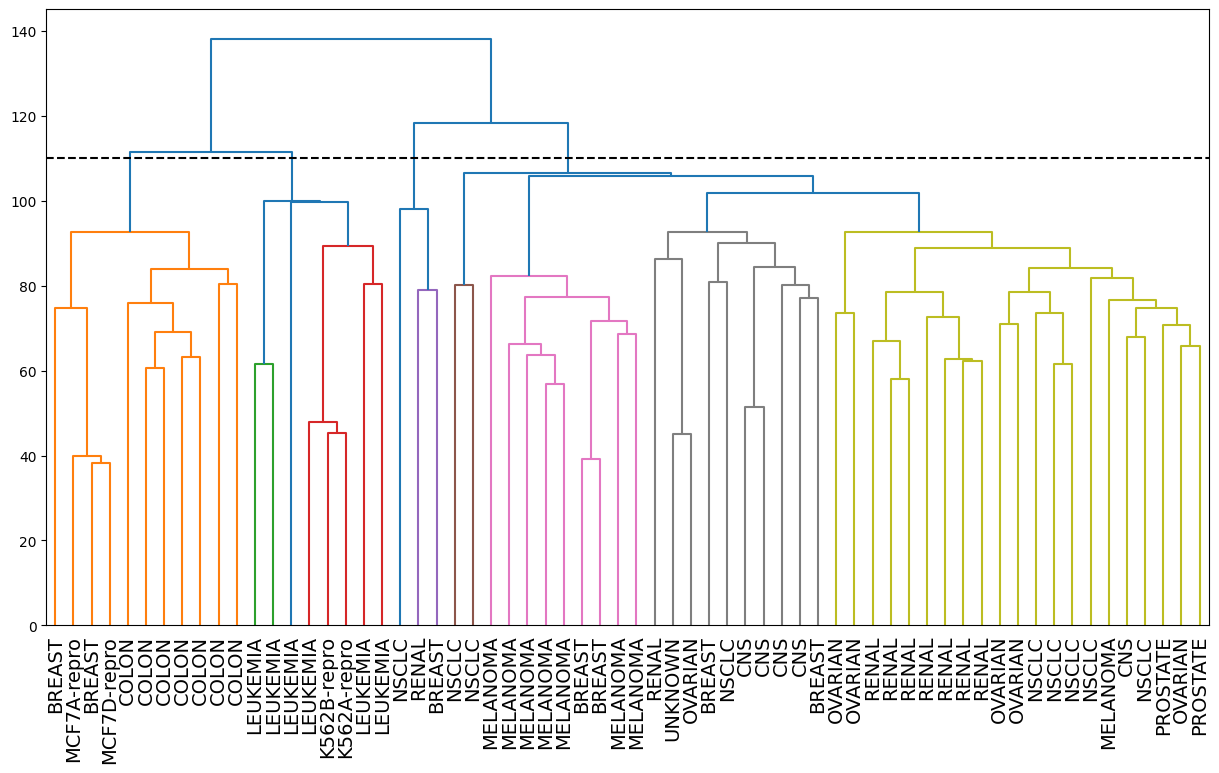

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (15,8))
dendrogram(nci_hc_complete,
           labels = nci_data.index,
           leaf_font_size = 14,
           show_leaf_counts = True)

plt.axhline(y=110, c='k', ls='dashed')
plt.show()

+ We claimed earlier that K-means clustering and hierarchical
clustering with the dendrogram cut to obtain the same number
of clusters can yield **very** different results.
+ How do these `NCI60` hierarchical
clustering results compare to what we get if we perform K-means clustering
with `K = 4`?


+ 我们之前声称，K 均值聚类和使用树状图切割以获得相同数量的聚类的层次聚类可以产生**非常**不同的结果。
+ 这些 `NCI60` 层次聚类结果与我们以 `K = 4` 执行 K 均值聚类时获得的结果相比如何？

In [ ]:
from sklearn.cluster import KMeans
kmean_4 = KMeans(n_clusters = 4, random_state = 123, n_init = 150)
kmean_4.fit(nci_data)
kmean_4.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

We can use a confusion matrix to compare the differences in how the two methods assigned observations to clusters:


我们可以使用混淆矩阵来比较两种方法将观测值分配到聚类的差异：

In [ ]:
pd.crosstab(index = kmean_4.labels_,
            columns = nci_hc_complete_4_clusters.T[0],
            rownames = ['K-Means'],
            colnames = ['Hierarchical'])

Hierarchical   0  1  2   3
K-Means                   
0              0  0  7   0
1              9  0  0   0
2             25  3  0   0
3              8  0  1  11

+ We see that the four clusters obtained using hierarchical clustering and Kmeans clustering are somewhat different.
+ Cluster 0 in K-means clustering is almost identical to cluster 2 in hierarchical clustering.
+ However, the other clusters differ: for instance, cluster 2 in K-means clustering contains a portion of the observations assigned to cluster 0 by hierarchical clustering, as well as all of the observations assigned to cluster 1 by hierarchical clustering.


+ 我们看到，使用层次聚类和 Kmeans 聚类得到的四个聚类有些不同。
+ K 均值聚类中的聚类 0 与层次聚类中的聚类 2 几乎相同。
+ 但是，其他聚类有所不同：例如，K 均值聚类中的聚类 2 包含层次聚类分配给聚类 0 的一部分观测值，以及层次聚类分配给聚类 1 的所有观测值。


## Expectation Maximization
K-means and hieracrchical cluserting are 'hard' clustering meaning that each observation belongs to exactly one cluster. There are other clustering algorithms that 'soft' cluster meaning that observations can belong to multiple clusters.

One way to perform soft clustering is by assuming that each cluster is modeled by a normal (gaussian) distribution. And so the whole data set is a mixture of gaussian also called Gaussian Mixture Model.

The goal here is to find the parameters for the multivariate gaussian and assign each observation a probability of being in a certain cluster.

### EM algorithm
In K-means, we start the algorithm by randomly assigning each point a cluster to find the first centroid. Somewhat similarly, the EM algorithm randomly assigns the parameters of gaussian distribution for each cluster. Then using bayes theorem (with initial priors as all equal), we can determine the probability of each point being a part of each cluster. This is expectation step.

The maximization step is to recalculate the parameters(mean and covariance) of the multivariate gaussian distribution using the now weighted (by probabilities) observations.



[Excellent video explanation of EM](https://www.youtube.com/watch?v=REypj2sy_5U)

(https://www.youtube.com/watch?v=iQoXFmbXRJA)




## 期望最大化
K-means 和层次聚类是“硬”聚类，这意味着每个观测值都只属于一个聚类。还有其他聚类算法是“软”聚类，这意味着观测值可以属于多个聚类。

执行软聚类的一种方法是假设每个聚类都由正态（高斯）分布建模。因此，整个数据集是高斯混合，也称为高斯混合模型。

这里的目标是找到多元高斯的参数，并为每个观测值分配一个属于某个聚类的概率。

### EM 算法
在 K-means 中，我们通过随机为每个点分配一个聚类来启动算法，以找到第一个质心。有点类似，EM 算法为每个聚类随机分配高斯分布的参数。然后使用贝叶斯定理（初始先验都相等），我们可以确定每个点成为每个聚类一部分的概率。这是期望步骤。

最大化步骤是使用现在加权（按概率）的观测值重新计算多元高斯分布的参数（均值和协方差）。

[EM 的出色视频解释](https://www.youtube.com/watch?v=REypj2sy_5U)

(https://www.youtube.com/watch?v=iQoXFmbXRJA)

In [ ]:
!pip install pandas_datareader

In [ ]:
import time

import pandas as pd
import pandas_datareader.data as web
import numpy as np
import scipy.stats as scs
from scipy.stats import multivariate_normal as mvn
import sklearn.mixture as mix

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



### To gain understanding of mixture models we have to start at the beginning with the expectation maximization algorithm and it's application


为了理解混合模型，我们必须从期望最大化算法及其应用开始

### First a little history on E-M

Reference: 4

Demptser, Laird & Rubin (1977)
    -unified previously unrelated work under "The EM Algorithm"
    - unified previously unrelated work under "The EM Algorithm"
    - overlooked E-M works - see gaps between foundational authors
        - Newcomb (1887)
        - McKendrick (1926) [+39 years]
        - Hartley (1958) [+32 years]
        - Baum et. al. (1970) [+12 years]
        - Dempters et. al. (1977) [+7 years]

#### *EM Algorithm developed over 90 years*

## EM provides general framework for solving problems

Examples include:
    - Filling in missing data from a sample set
    - Discovering values of latent variables
    - Estimating parameters of HMMs
    - Estimating parameters of finite mixtures [models]
    - Unsupervised learning of clusters
    - etc...
    
### How does the EM algorithm work?

EM is an iterative process that begins with a "naive" or random initialization and then alternates between the expectation and maximization steps until the algorithm reaches convergence.

To describe this in words imagine we have a simple data set consisting of class heights with groups separated by gender.


### 首先介绍一下 E-M 的历史

参考文献：4

Demptser、Laird 和 Rubin (1977)
- 将之前不相关的作品统一到“EM 算法”下
- 将之前不相关的作品统一到“EM 算法”下
- 忽略了 E-M 作品 - 查看基础作者之间的差距
- Newcomb (1887)
- McKendrick (1926) [+39 年]
- Hartley (1958) [+32 年]
- Baum 等人 (1970) [+12 年]
- Dempters 等人（1977 年）[+7 年]

#### *EM 算法开发了 90 多年*

## EM 提供了解决问题的通用框架

示例包括：
- 从样本集中填充缺失数据
- 发现潜在变量的值
- 估计 HMM 的参数
- 估计有限混合 [模型] 的参数
- 聚类的无监督学习
- 等等...

### EM 算法如何工作？

EM 是一个迭代过程，从“简单”或随机初始化开始，然后在期望和最大化步骤之间交替，直到算法达到收敛。

用文字描述这一点，假设我们有一个简单的数据集，由班级身高和按性别分开的组组成。

In [ ]:
# import class heights
f = 'https://raw.githubusercontent.com/BlackArbsCEO/Mixture_Models/K-Means%2C-E-M%2C-Mixture-Models/Class_heights.csv'

data = pd.read_csv(f)
# data.info()

height = data['Height (in)']
data

Gender  Height (in)
0     Male           72
1     Male           72
2   Female           63
3   Female           62
4   Female           62
5     Male           73
6   Female           64
7   Female           63
8   Female           67
9     Male           71
10    Male           72
11  Female           63
12    Male           71
13  Female           67
14  Female           62
15  Female           63
16    Male           66
17  Female           60
18  Female           68
19  Female           65
20  Female           64

Now imagine that we did not have the convenient gender labels associated with each data point. How could we estimate the two group means?

First let's set up our problem.

In this example we hypothesize that these height data points are drawn from two distributions with two means - < $\mu_1$, $\mu_2$ >.

The heights are the observed $x$ values.

The hidden variables, which EM is going to estimate, can be thought of in the following way. Each $x$ value has 2 associated $z$ values. These $z$ values $<z_1$, $z_2>$ represent the distribution (or class or cluster) that the data point is drawn from.

Understanding the range of values the $z$ values can take is important.

In k-means, the two $z$'s can only take the values of 0 or 1. If the $x$ value came from the first distribution (cluster), then $z_1$=1 and $z_2$=0 and vice versa. This is called **hard** clustering.

In Gaussian Mixture Models, the $z$'s can take on any value between 0 and 1 because the x values are considered to be drawn probabilistically from 1 of the 2 distributions. For example $z$ values can be $z_1=0.85$ and $z_2\geq0.15$, which represents a strong probability that the $x$ value came from distribution 1 and smaller probability that it came from distribution 2. This is called **soft** or **fuzzy** clustering.



现在想象一下，我们没有与每个数据点相关联的方便的性别标签。我们如何估计两组均值？

首先让我们设置我们的问题。

在这个例子中，我们假设这些身高数据点来自两个具有两个均值的分布 - < $\mu_1$, $\mu_2$ >。

身高是观察到的 $x$ 值。

EM 将要估计的隐藏变量可以按以下方式考虑。每个 $x$ 值都有 2 个关联的 $z$ 值。这些 $z$ 值 $<z_1$, $z_2>$ 表示数据点来自的分布（或类或集群）。

了解 $z$ 值可以取的值范围很重要。

在 k-means 中，两个 $z$ 只能取 0 或 1 的值。如果 $x$ 值来自第一个分布（集群），则 $z_1$=1 且 $z_2$=0，反之亦然。这称为**硬**聚类。

在高斯混合模型中，$z$ 可以取 0 到 1 之间的任何值，因为 x 值被认为是从 2 个分布中的 1 个概率中抽取的。例如，$z$ 值可以是 $z_1=0.85$ 和 $z_2\geq0.15$，这表示 $x$ 值来自分布 1 的概率很大，来自分布 2 的概率较小。这称为**软**或**模糊**聚类。


For this example, we will assume the x values are drawn from Gaussian distributions.

To start the algorithm, we choose two random means.

From there we repeat the following until convergence.

#### The expectation step:

We calculate the expected values $E(z_{ij})$, which is the probability that $x_i$ was drawn from the $jth$ distribution.
    
$$E(z_{ij}) = \frac{p(x = x_i|\mu = \mu_j)}{\sum_{n=1}^2 p(x = x_i|\mu = \mu_j)}$$


$$= \frac{ e^{-\frac{1}{2\sigma^2}(x_i - \mu_j)^2} }
{ \sum_{n=1}^2e^{-\frac{1}{2\sigma^2}(x_i - \mu_n)^2} }$$

The formula simply states that the expected value for $z_{ij}$ is the probability $x_i$ given $\mu_j$ divided by the sum of the probabilities that $x_i$ belonged to each $\mu$


对于此示例，我们假设 x 值来自高斯分布。

要启动算法，我们选择两个随机均值。

从那里我们重复以下步骤直到收敛。

#### 期望步骤：

我们计算期望值 $E(z_{ij})$，即 $x_i$ 来自第 $j$ 个分布的概率。

$$E(z_{ij}) = \frac{p(x = x_i|\mu = \mu_j)}{\sum_{n=1}^2 p(x = x_i|\mu = \mu_j)}$$

$$= \frac{ e^{-\frac{1}{2\sigma^2}(x_i - \mu_j)^2} }
{ \sum_{n=1}^2e^{-\frac{1}{2\sigma^2}(x_i - \mu_n)^2} }$$

该公式简单地说明，$z_{ij}$ 的预期值是给定 $\mu_j$ 的概率 $x_i$ 除以 $x_i$ 属于每个 $\mu$ 的概率之和

#### The maximization step:

After calculating all $E(z_{ij})$ values we can calculate (update) new $\mu$ values.

$$ \mu_j = \frac {\sum_{i=1}^mE(z_{ij})x_i} {\sum_{i=1}^mE(z_{ij})}$$

This formula generates the maximum likelihood estimate.

By repeating the E-step and M-step we are guaranteed to find a local maximum giving us a maximum likelihood estimation of our hypothesis.



#### 最大化步骤：

计算完所有 $E(z_{ij})$ 值后，我们可以计算（更新）新的 $\mu$ 值。

$$ \mu_j = \frac {\sum_{i=1}^mE(z_{ij})x_i} {\sum_{i=1}^mE(z_{ij})}$$

此公式生成最大似然估计。

通过重复 E 步和 M 步，我们一定能找到一个局部最大值，从而为我们的假设提供最大似然估计。

### What are Maximum Likelihood Estimates (MLE) 什么是最大似然估计

    1. Parameters describe characteristics (attributes) of a population.
    These parameter values are estimated from samples collected from that
    population.

    2. A MLE is a parameter estimate that is most consistent with the
    sampled data. By definition it maximizes the likelihood function. One
    way to accomplish this is to take the first derivative of the
    likelihood function w/ respect to the parameter theta and solve for 0.
    This value maximizes the likelihood function and is the MLE.


1. 参数描述人群的特征（属性）。
这些参数值是根据从该人群收集的样本估算出来的。

2. MLE 是与采样数据最一致的参数估计值。根据定义，它使似然函数最大化。实现这一点的一种方法是取似然函数对参数 theta 的一阶导数并求解 0。
该值使似然函数最大化，即为 MLE。


### A quick example of a maximum likelihood estimate
    
#### You flip a coin 10 times and observe the following sequence
##### (H, T, T, H, T, T, T, T, H, T)
#### What's the MLE of observing 3 heads in 10 trials?    

#### simple answer:    
    The frequentist MLE is (# of successes) / (# of trials) or 3/10

#### solving first derivative of binomial distribution answer:    

\begin{align}
\mathcal L(\theta) & = {10 \choose 3}\theta^3(1-\theta)^7 \\[1ex]
log\mathcal L(\theta) & = log{10 \choose 3} + 3log\theta + 7log(1 - \theta) \\[1ex]
\frac{dlog\mathcal L(\theta)}{d(\theta)} & = \frac 3\theta - \frac{7}{1-\theta} = 0 \\[1ex]
\frac 3\theta & = \frac{7}{1 - \theta} \Rightarrow \frac{3}{10}
\end{align}

#### That's a MLE! This is the estimate that is most consistent with the observed data


### 最大似然估计的简单示例

#### 你抛硬币 10 次，并观察到以下序列
##### (H、T、T、H、T、T、T、T、H、T)
#### 在 10 次试验中观察到 3 次正面的 MLE 是多少？

#### 简单答案：
频率 MLE 是 (成功次数) / (试验次数) 或 3/10

#### 解决二项分布的一阶导数答案：

\begin{align}
\mathcal L(\theta) & = {10 \choose 3}\theta^3(1-\theta)^7 \\[1ex]
log\mathcal L(\theta) & = log{10 \choose 3} + 3log\theta + 7log(1 - \theta) \\[1ex]
\frac{dlog\mathcal L(\theta)}{d(\theta)} & = \frac 3\theta - \frac{7}{1-\theta} = 0 \\[1ex]
\frac 3\theta & = \frac{7}{1 - \theta} \Rightarrow \frac{3}{10}
\end{align}

#### 这是 MLE！这是与观察到的数据最一致的估计值

Back to our height example. Using the generalized Gaussian mixture model code sourced from Duke's computational statistics we can visualize this process.


回到我们的身高示例。使用来自 Duke 计算统计的广义高斯混合模型代码，我们可以将这个过程可视化。

In [ ]:
# Code sourced from:
#    http://people.duke.edu/~ccc14/sta-663/EMAlgorithm.html

def em_gmm_orig(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n, p = xs.shape
    k = len(pis)

    ll_old = 0
    for i in range(max_iter):
        print('\nIteration: ', i)
        print()
        exp_A = []
        exp_B = []
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(len(mus)):
            for i in range(n):
                ws[j, i] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
        ws /= ws.sum(0)

        # M-step
        pis = np.zeros(k)
        for j in range(len(mus)):
            for i in range(n):
                pis[j] += ws[j, i]
        pis /= n

        mus = np.zeros((k, p))
        for j in range(k):
            for i in range(n):
                mus[j] += ws[j, i] * xs[i]
            mus[j] /= ws[j, :].sum()

        sigmas = np.zeros((k, p, p))
        for j in range(k):
            for i in range(n):
                ys = np.reshape(xs[i]- mus[j], (2,1))
                sigmas[j] += ws[j, i] * np.dot(ys, ys.T)
            sigmas[j] /= ws[j,:].sum()

        new_mus = (np.diag(mus)[0], np.diag(mus)[1])
        new_sigs = (np.unique(np.diag(sigmas[0]))[0], np.unique(np.diag(sigmas[1]))[0])
        df = (pd.DataFrame(index=[1, 2]).assign(mus = new_mus).assign(sigs = new_sigs))

        xx = np.linspace(0, 100, 100)
        yy = scs.multivariate_normal.pdf(xx, mean=new_mus[0], cov=new_sigs[0])

        colors = sns.color_palette('Dark2', 3)
        fig, ax = plt.subplots(figsize=(9, 7))
        ax.set_ylim(-0.001, np.max(yy))
        ax.plot(xx, yy, color=colors[1])
        ax.axvline(new_mus[0], ymin=0., color=colors[1])
        ax.fill_between(xx, 0, yy, alpha=0.5, color=colors[1])
        lo, hi = ax.get_ylim()
        ax.annotate(f'$\mu_1$: {new_mus[0]:3.2f}',
                    fontsize=12, fontweight='demi',
                    xy=(new_mus[0], (hi-lo) / 2),
                    xycoords='data', xytext=(80, (hi-lo) / 2),
                    arrowprops=dict(facecolor='black', connectionstyle="arc3,rad=0.2",shrink=0.05))
        ax.fill_between(xx, 0, yy, alpha=0.5, color=colors[2])

        yy2 = scs.multivariate_normal.pdf(xx, mean=new_mus[1], cov=new_sigs[1])

        ax.plot(xx, yy2, color=colors[2])
        ax.axvline(new_mus[1], ymin=0., color=colors[2])
        lo, hi = ax.get_ylim()
        ax.annotate(f'$\mu_2$: {new_mus[1]:3.2f}',
                    fontsize=12, fontweight='demi',
            xy=(new_mus[1], (hi-lo) / 2), xycoords='data', xytext=(25, (hi-lo) / 2),
            arrowprops=dict(facecolor='black', connectionstyle="arc3,rad=0.2",shrink=0.05))
        ax.fill_between(xx, 0, yy2, alpha=0.5, color=colors[2])

        dot_kwds = dict(markerfacecolor='white', markeredgecolor='black', markeredgewidth=1, markersize=10)
        ax.plot(height, len(height)*[0], 'o', **dot_kwds)
        ax.set_ylim(-0.001, np.max(yy2))


        print(df.T)

        # update complete log likelihoood 更新完全对数似然
        ll_new = 0.0
        for i in range(n):
            s = 0
            for j in range(k):
                s += pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
            ll_new += np.log(s)
        print(f'log_likelihood: {ll_new:3.4f}')
        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return ll_new, pis, mus, sigmas


Iteration:  0

               1           2
mus    61.362928   59.659685
sigs  469.240750  244.382352
log_likelihood: -141.8092

Iteration:  1

              1          2
mus    68.73773  63.620554
sigs  109.85442   7.228183
log_likelihood: -118.0520

Iteration:  2

              1          2
mus   70.569842  63.688825
sigs   4.424452   3.139277
log_likelihood: -100.2591

Iteration:  3

              1          2
mus   70.569842  63.688825
sigs   4.424427   3.139278
log_likelihood: -100.2591


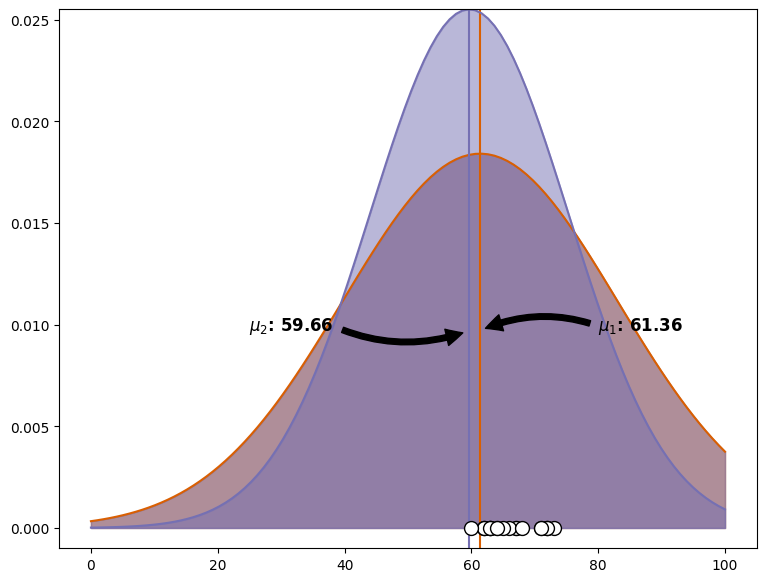

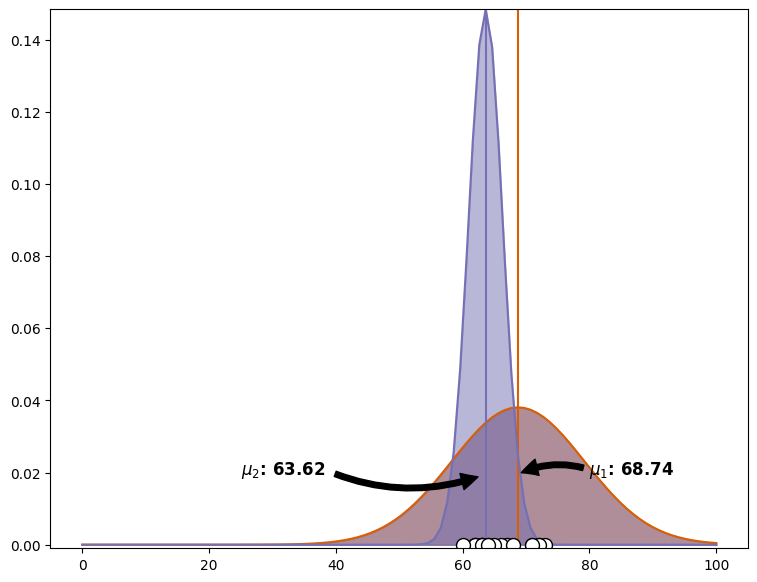

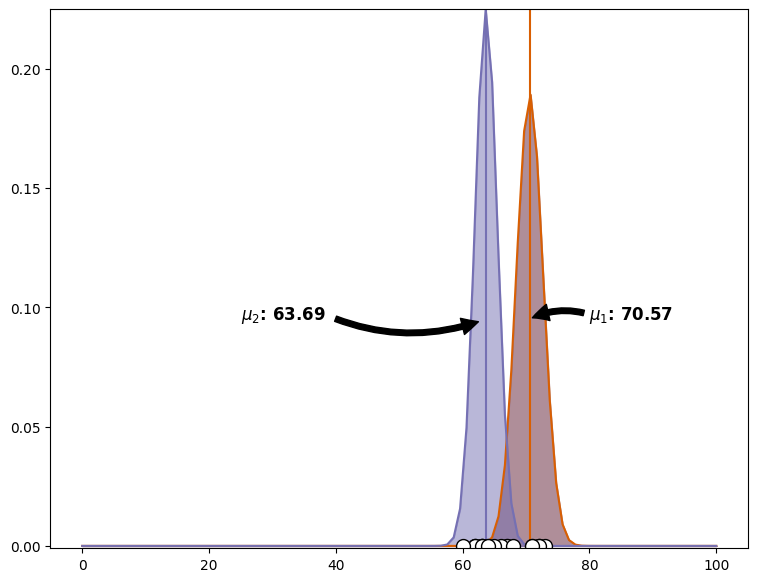

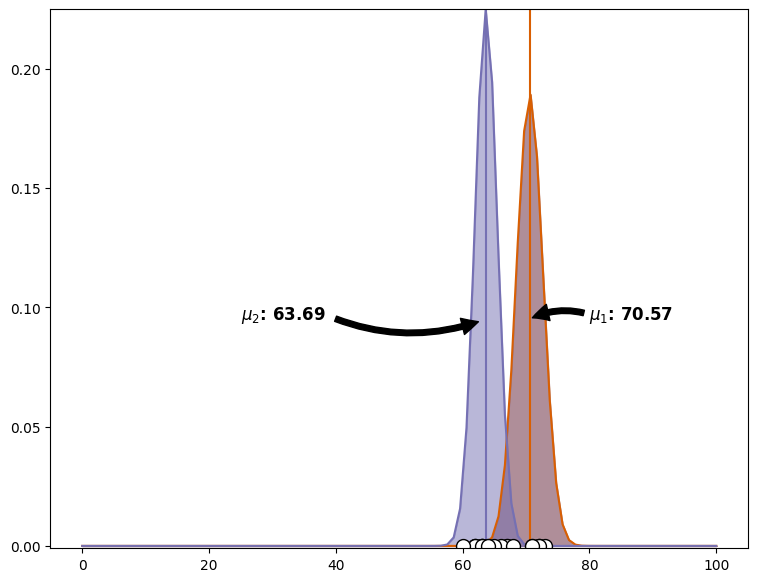

In [ ]:
height = data['Height (in)']
n = len(height)

# Ground truthish 地面实况
_mus = np.array([[0, data.groupby('Gender').mean().iat[0, 0]],
                 [data.groupby('Gender').mean().iat[1, 0], 0]])
_sigmas = np.array([[[5, 0], [0, 5]],
                    [[5, 0],[0, 5]]])
_pis = np.array([0.5, 0.5]) # priors 先验

# initial random guesses for parameters 参数的初始随机猜测
np.random.seed(0)

pis = np.random.random(2)
pis /= pis.sum()
mus = np.random.random((2,2))
sigmas = np.array([np.eye(2)] * 2) * height.std()

# generate our noisy x values 生成嘈杂的 x 值
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

ll, pis, mus, sigmas = em_gmm_orig(xs, pis, mus, sigmas)

# In the below plots the white dots represent the observed heights. 在下图中，白点代表观察到的高度。

#### Notice how the algorithm was able to estimate the true means starting from random guesses for the parameters.

注意算法如何能够从参数的随机猜测开始估计真实的均值。

### Now that we have a grasp of the algorithm we can examine K-Means as a form of EM 现在我们已经掌握了算法，我们可以将 K-Means 视为 EM 的一种形式

K-Means is an unsupervised learning algorithm used for clustering multidimensional data sets.

The basic form of K-Means makes two assumptions

    1. Each data point is closer to its own cluster center than the other
    cluster centers
    2. A cluster center is the arithmetic mean of all the points that belong
    to the cluster.

The expectation step is done by calculating the pairwise distances  of every data point and assigning cluster membership to the closest center (mean)

The maximization step is simply the arithmetic mean of the previously assigned data points for each cluster

#### The following sections borrow heavily from Jake Vanderplas' [Python Data Science Handbook](https://www.amazon.com/gp/product/1491912057/ref=as_li_qf_sp_asin_il_tl?ie=UTF8&tag=blkarbs-20&camp=1789&creative=9325&linkCode=as2&creativeASIN=1491912057&linkId=e000ed9627cfe6b505be11c50118decb)


K-Means 是一种用于对多维数据集进行聚类的无监督学习算法。

K-Means 的基本形式有两个假设

1. 每个数据点距离自己的聚类中心比其他聚类中心更近

2. 聚类中心是属于该聚类的所有点的算术平均值。

期望步骤是通过计算每个数据点的成对距离并将聚类成员分配给最近的中心（平均值）来完成的

最大化步骤只是每个聚类先前分配的数据点的算术平均值

#### 以下部分大量借鉴了 Jake Vanderplas 的 [Python 数据科学手册](https://www.amazon.com/gp/product/1491912057/ref=as_li_qf_sp_asin_il_tl?ie=UTF8&tag=blkarbs-20&camp=1789&creative=9325&linkCode=as2&creativeASIN=1491912057&linkId=e000ed9627cfe6b505be11c50118decb)

In [ ]:
# Let's define some demo variables and make some blobs
# 让我们定义一些演示变量并创建一些 blob
# demo variables 演示变量

k = 4
n_draws = 500
sigma = .7
random_state = 0
dot_size = 50
cmap = 'viridis'

Text(0.5, 1.0, 'k-means make blobs')

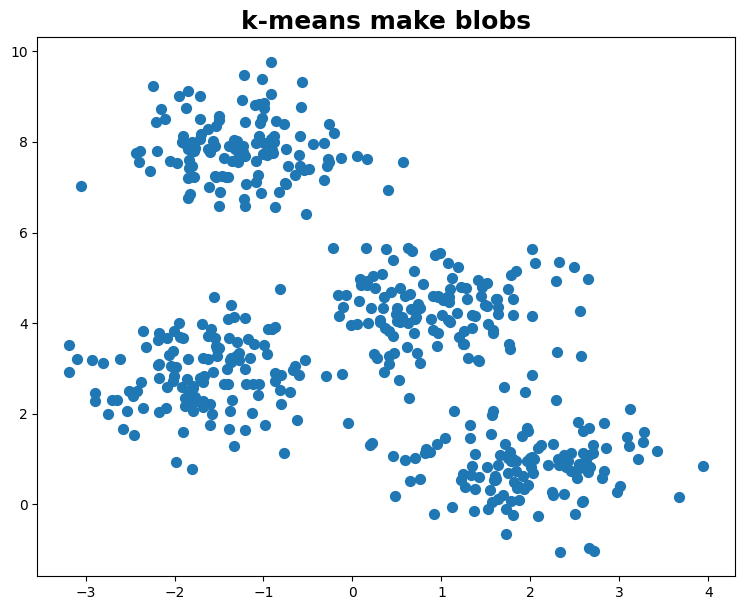

In [ ]:
# make blobs 制造斑点

from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples = n_draws,
                       centers = k,
                       cluster_std = sigma,
                       random_state = random_state)

fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(X[:, 0], X[:, 1], s=dot_size)
plt.title('k-means make blobs', fontsize=18, fontweight='demi')

In [ ]:
# sample implementation 示例实现
# code sourced from: 代码来源于：
#   http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Random initialization (choose random clusters)随机初始化（选择随机聚类）
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center 根据最近中心分配标签
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points 通过点找到新的中心
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence 检查收敛性
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

Text(0.5, 1.0, 'find_clusters() k-means func')

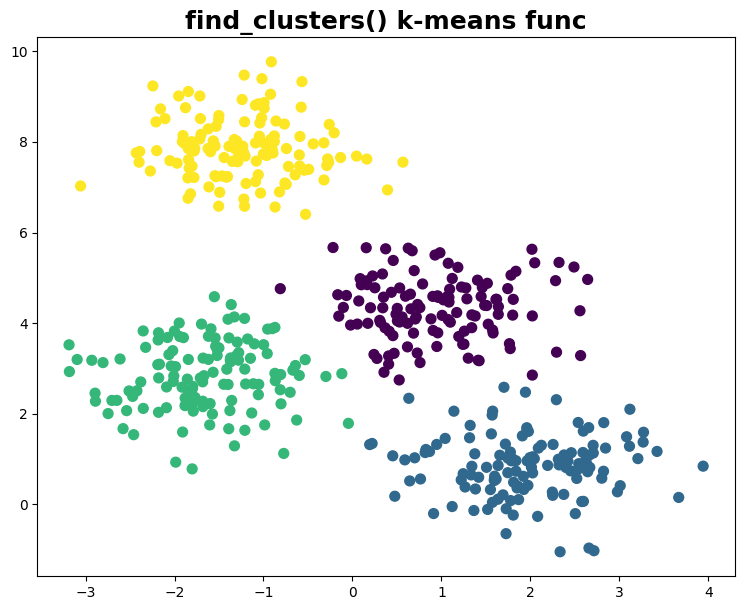

In [ ]:
# let's test the implementation 让我们测试一下实现

centers, labels = find_clusters(X, k)

fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(X[:, 0], X[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.title('find_clusters() k-means func', fontsize=18, fontweight='demi')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'sklearn k-means')

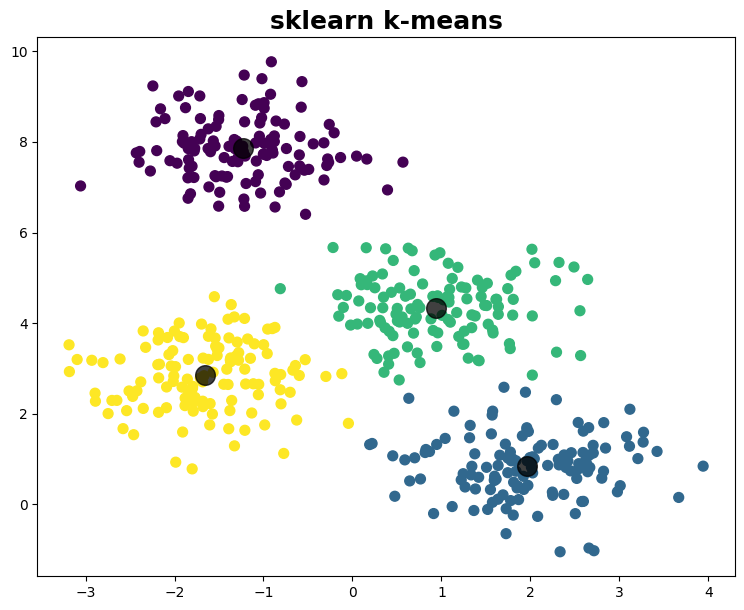

In [ ]:
# now let's compare this to the sklearn's KMeans() algorithm 现在让我们将其与 sklearn 的 KMeans() 算法进行比较

# fit k-means to blobs 将 k-means 拟合到 blob

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# visualize prediction 可视化预测
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=dot_size, cmap=cmap)

# get centers for plot 获取情节中心
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
plt.title('sklearn k-means', fontsize=18, fontweight='demi')

#### To build our intuition of this process, play with the following interactive code from Jake Vanderplas in an Jupyter (IPython) notebook

为了建立我们对这个过程的直觉，我们在 Jupyter (IPython) 笔记本中使用 Jake Vanderplas 编写的以下交互式代码

interactive(children=(Dropdown(description='frame', options=(0, 10, 20, 30, 40, 50), value=0), Dropdown(descri…

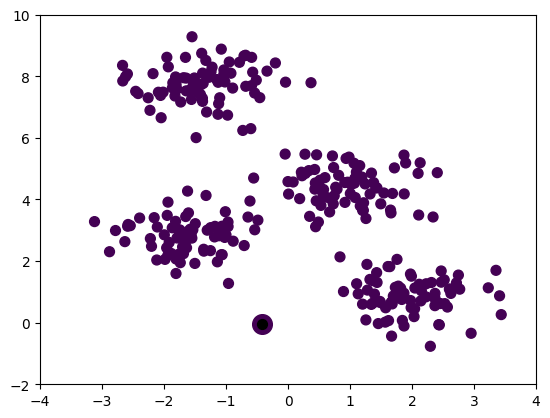

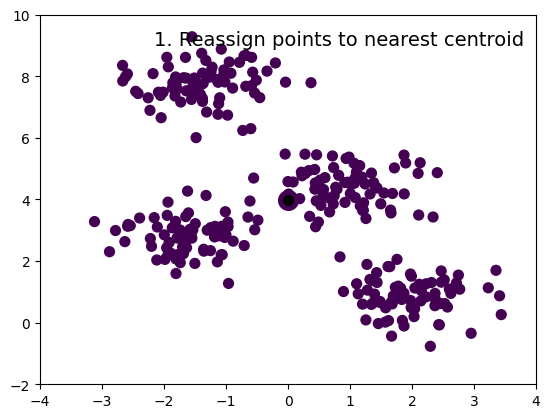

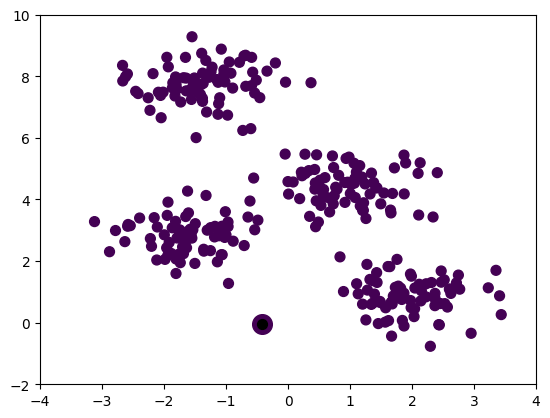

In [ ]:
# code sourced from:
#   http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/06.00-Figure-Code.ipynb#Covariance-Type

from ipywidgets import interact

def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=0.60)

    def plot_points(X, labels, n_clusters):
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis',
                    vmin=0, vmax=n_clusters - 1);

    def plot_centers(centers):
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c=np.arange(centers.shape[0]),
                    s=200, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c='black', s=50)


    def _kmeans_step(frame=0, n_clusters=4):
        rng = np.random.RandomState(2)
        labels = np.zeros(X.shape[0])
        centers = rng.randn(n_clusters, 2)

        nsteps = frame // 3

        for i in range(nsteps + 1):
            old_centers = centers
            if i < nsteps or frame % 3 > 0:
                labels = pairwise_distances_argmin(X, centers)

            if i < nsteps or frame % 3 > 1:
                centers = np.array([X[labels == j].mean(0)
                                    for j in range(n_clusters)])
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]

        # plot the data and cluster centers 绘制数据和聚类中心
        plot_points(X, labels, n_clusters)
        plot_centers(old_centers)

        # plot new centers if third frame 如果是第三帧则绘制新中心
        if frame % 3 == 2:
            for i in range(n_clusters):
                plt.annotate('', centers[i], old_centers[i],
                             arrowprops=dict(arrowstyle='->', linewidth=1))
            plot_centers(centers)

        plt.xlim(-4, 4)
        plt.ylim(-2, 10)

        if frame % 3 == 1:
            plt.text(3.8, 9.5, "1. Reassign points to nearest centroid",
                     ha='right', va='top', size=14)#将点重新分配到最近的质心
        elif frame % 3 == 2:
            plt.text(3.8, 9.5, "2. Update centroids to cluster means",
                     ha='right', va='top', size=14)#将质心更新为聚类均值

    return interact(_kmeans_step, frame=[0, 10, 20, 30, 40, 50],
                    n_clusters=[min_clusters, max_clusters])

plot_kmeans_interactive();

### Now we are ready to explore some of the nuances/issues of implementing K-Means as an expectation maximization algorithm


现在我们准备探讨将 K-Means 实现为期望最大化算法的一些细微差别/问题

### the globally optimal result is not guaranteed
    - EM is guaranteed to improve the result in each iteration but there
    are no guarantees that it will find the global best. See the following
    example, where we initalize the algorithm with a different seed.

### practical solution:
    - Run the algorithm w/ multiple random initializations
    - This is done by default in sklearn


### 无法保证全局最优结果
- EM 保证在每次迭代中改进结果，但无法保证它会找到全局最优结果。请参见以下示例，其中我们使用不同的种子初始化算法。

### 实用解决方案：
- 使用多个随机初始化运行算法
- 默认情况下，这是 sklearn 中的操作

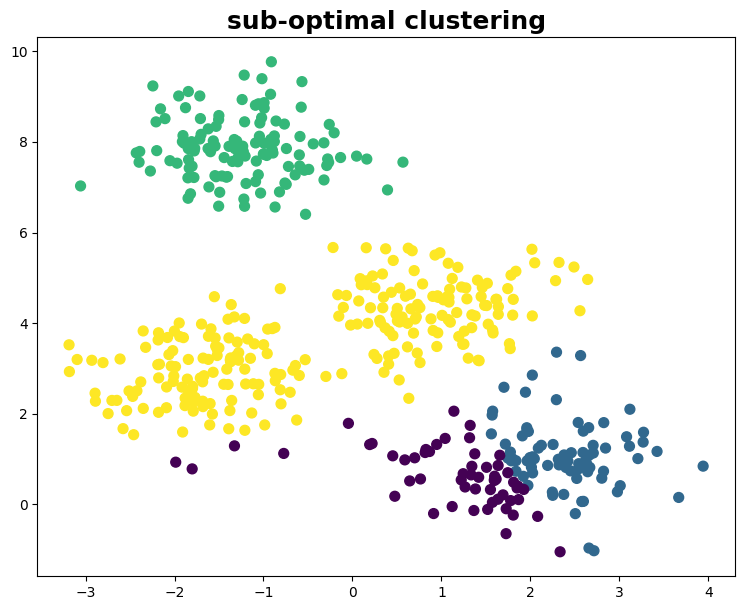

In [ ]:
centers, labels = find_clusters(X, k, rseed=11)

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('sub-optimal clustering', fontsize=18, fontweight='demi')#次优聚类
ax.scatter(X[:, 0], X[:, 1], c=labels, s=dot_size, cmap=cmap)

### number of means (clusters) have to be selected beforehand
    - k-means cannot learn the optimal number of clusters from the data.
    If we ask for six clusters it will find six clusters, which may or
    may not be meaningful.
    
### practical solution:
    - use a more complex clustering algorithm like Gaussian Mixture
    Models, or one that can choose a suitable number of clusters (DBSCAN,
    mean-shift, affinity propagation)


### 必须事先选择均值（聚类）的数量
- k-means 无法从数据中学习最佳聚类数量。
如果我们要求六个聚类，它会找到六个聚类，这可能有意义，也可能没有意义。

### 实际解决方案：
- 使用更复杂的聚类算法，如高斯混合
模型，或可以选择合适数量的聚类算法（DBSCAN、
均值漂移、亲和力传播）

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


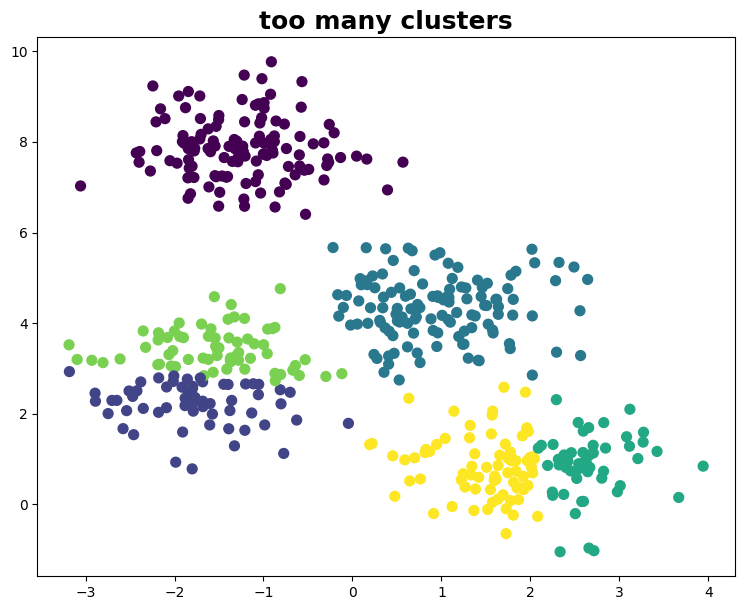

In [ ]:
labels6 = KMeans(6, random_state=random_state).fit_predict(X)

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('too many clusters', fontsize=18, fontweight='demi')#集群过多
ax.scatter(X[:, 0], X[:, 1], c=labels6, s=dot_size, cmap=cmap)

### k-means is terrible for non-linear data:
    - this results because of the assumption that points will be closer to their own cluster center than others

### practical solutions:
    - transform data into higher dimension where linear separation is possible e.g., spectral clustering


### k-means 不适合非线性数据：
- 这是因为假设点会比其他点更接近自己的聚类中心

### 实际解决方案：
- 将数据转换为可以进行线性分离的更高维度，例如谱聚类

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


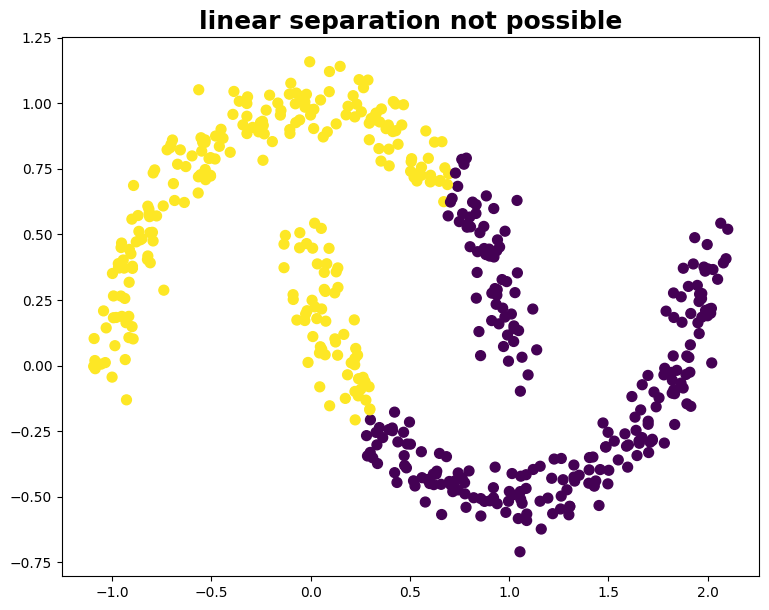

In [ ]:
from sklearn.datasets import make_moons

X_mn, y_mn = make_moons(500, noise=.07, random_state=random_state)

labelsM = KMeans(2, random_state=random_state).fit_predict(X_mn)

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('linear separation not possible', fontsize=18, fontweight='demi')#无法进行线性分离
ax.scatter(X_mn[:, 0], X_mn[:, 1], c=labelsM, s=dot_size, cmap=cmap)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


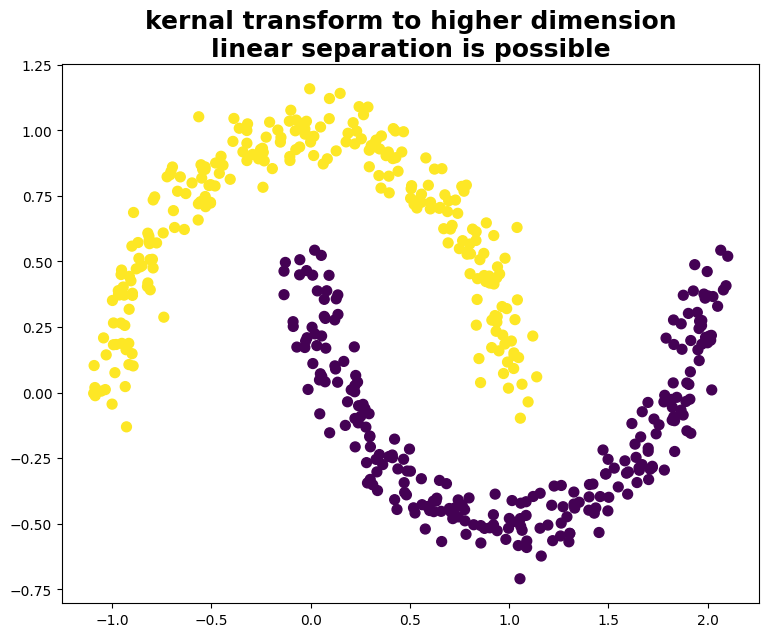

In [ ]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')

labelsS = model.fit_predict(X_mn)

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('kernal transform to higher dimension\nlinear separation is possible', fontsize=18, fontweight='demi')#核变换到更高维度\可以进行线性分离
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=labelsS, s=dot_size, cmap=cmap)

### K-Means is known as a hard clustering algorithm because clusters are not allowed to overlap.  

> ___"One way to think about the k-means model is that it places a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster, with a radius defined by the most distant point in the cluster. This radius acts as a hard cutoff for cluster assignment within the training set: any point outside this circle is not considered a member of the cluster.___ -- <cite> [Jake VanderPlas Python Data Science Handbook] [1]</cite>


### K-Means 被称为硬聚类算法，因为聚类不允许重叠。

> ___“思考 k-means 模型的一种方法是，它在每个聚类的中心放置一个圆圈（或在更高维度中放置一个超球体），半径由聚类中最远的点定义。此半径充当训练集内聚类分配的硬截止点：此圆圈之外的任何点都不被视为聚类的成员。___ -- <cite> [Jake VanderPlas Python 数据科学手册] [1]</cite>


[1]:http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Clusters are hard circular boundaries')

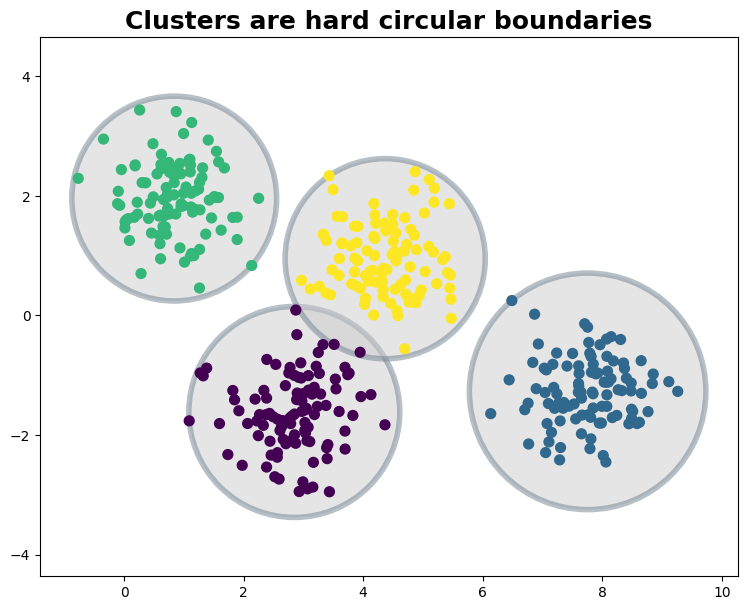

In [ ]:
# k-means weaknesses that mixture models address directly 混合模型直接解决的 K 均值弱点
# code sourced from:
#   http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb

from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=k, rseed=2, ax=None):
    labels = kmeans.fit_predict(X)

    # plot input data 绘制输入数据
    #ax = ax or plt.gca() # <-- nice trick
    fig, ax = plt.subplots(figsize=(9,7))
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1],
               c=labels, s=dot_size, cmap=cmap, zorder=2)

    # plot the representation of Kmeans model 绘制 Kmeans 模型的表示
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels==i], [center]).max()
             for i, center in enumerate(centers)]

    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC',edgecolor='slategrey',
                                lw=4, alpha=0.5, zorder=1))
    return

X3, y_true = make_blobs(n_samples = 400,
                       centers = k,
                       cluster_std = .6,
                       random_state = random_state)
X3 = X3[:, ::-1] # better plotting

kmeans = KMeans(n_clusters=k, random_state=random_state)
plot_kmeans(kmeans, X3)
plt.title('Clusters are hard circular boundaries', fontsize=18, fontweight='demi')#簇是硬圆形边界

#### A resulting issue of K-Means' circular boundaries is that it has no way to account for oblong or elliptical clusters.


#### K-Means 圆形边界的一个问题是它无法解释长方形或椭圆形的簇。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Clusters cannot adjust to elliptical data structures')

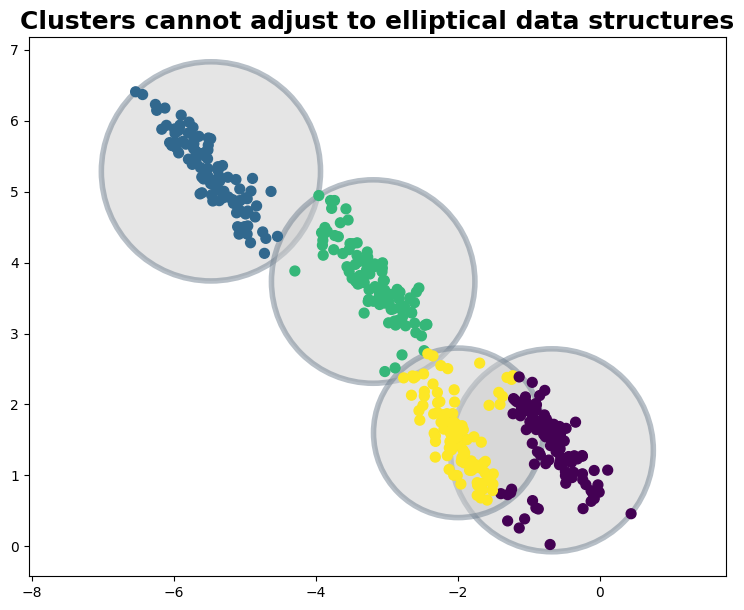

In [ ]:
rng = np.random.RandomState(13)
X3_stretched = np.dot(X3, rng.randn(2, 2))

kmeans = KMeans(n_clusters=k, random_state=random_state)
plot_kmeans(kmeans, X3_stretched)
plt.title('Clusters cannot adjust to elliptical data structures',
         fontsize=18, fontweight='demi')#集群无法适应椭圆形数据结构

### There are two ways we can extend K-Means

    1. measure uncertainty in cluster assignments by comparing distances to all cluster centers
    2. allow for flexibility in the shape of the cluster boundaries by using ellipses


### 我们可以通过两种方式扩展 K-Means

1. 通过比较与所有聚类中心的距离来测量聚类分配中的不确定性
2. 通过使用椭圆允许聚类边界形状的灵活性

### Recall our previous height example, and let's  assume that each cluster is a Gaussian distribution!

#### Gaussian distributions give flexibility to the clustering, and the same basic two step E-M algorithm used in K-Means is applied here as well.

1. Randomly initialize location and shape
2. Repeat until converged:
* **E-step**: for each point, find weights encoding the probability of membership in each cluster.
       
* **M-step**: for each cluster, update its location, normalization, and shape based on all data points, making use of the weights
       
#### The result of this process is that we end up with a smooth Gaussian cluster better fitted to the shape of the data, instead of a rigid inflexible circle.

#### Note that because we still are using the E-M algorithm there is no guarantee of a globally optimal result. We can visualize the results of the model.



### 回想一下我们之前的高度示例，假设每个簇都是高斯分布！

#### 高斯分布为聚类提供了灵活性，这里也应用了 K-Means 中使用的相同的基本两步 E-M 算法。

1. 随机初始化位置和形状
2. 重复直到收敛：
* **E-step**：对于每个点，找到编码每个簇成员概率的权重。

* **M-step**：对于每个簇，根据所有数据点更新其位置、规范化和形状，利用权重

#### 这个过程的结果是我们最终得到一个更适合数据形状的平滑高斯簇，而不是一个僵硬的不灵活的圆圈。

#### 请注意，由于我们仍在使用 E-M 算法，因此无法保证全局最优结果。我们可以可视化模型的结果。

In [ ]:
# code sourced from:
#  http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance 绘制具有给定位置和协方差的椭圆"""

    # Convert covariance to principal axes 将协方差转换为主轴
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse 绘制椭圆
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                            angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):

    fig, ax = plt.subplots(figsize=(9,7))
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)

    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=dot_size, cmap=cmap, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=dot_size, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, ax=ax, alpha=w * w_factor)

<ipython-input-21-b4a42385a8d6>:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


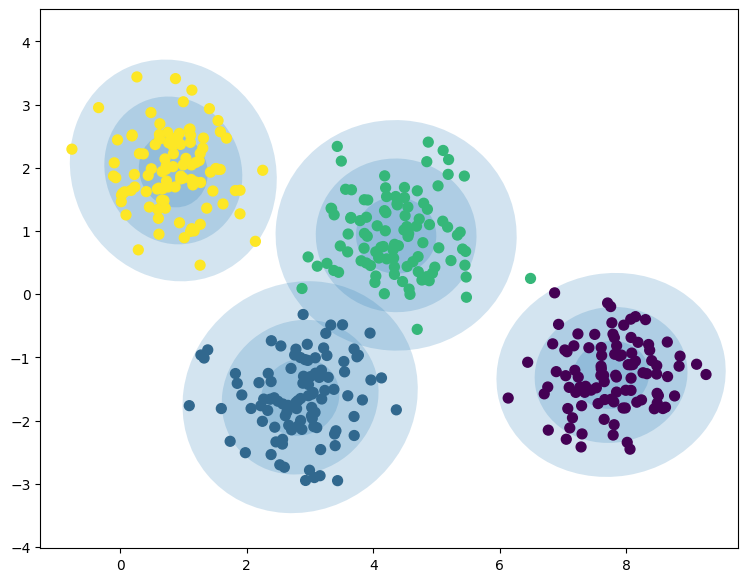

In [ ]:
gmm = mix.GaussianMixture(n_components=k, random_state=random_state)
plot_gmm(gmm, X3)

<ipython-input-21-b4a42385a8d6>:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


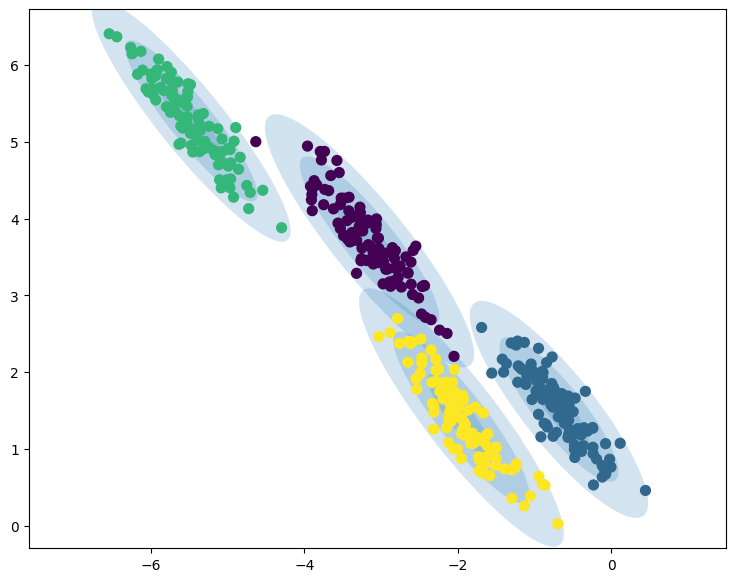

In [ ]:
# lets test on the stretched data set 让我们在拉伸数据集上进行测试

gmm = mix.GaussianMixture(n_components=k, random_state=random_state+1)
plot_gmm(gmm, X3_stretched)

#### Notice how much better the model is able to fit the clusters when we assume each cluster is a Gaussian distribution instead of circle whose radius is defined by the most distant point.

#### 请注意，当我们假设每个聚类都是高斯分布而不是半径由最远点定义的圆时，模型能够更好地拟合聚类。

## Gaussian Mixture Models as a tool for Density Estimation

#### The technical term for this type of model is:

> __generative probabilistic model__

#### Why you ask?

Because this model is really about characterizing the distribution of the entire dataset and not necessarily clustering. The power of these types of models is that they allow us to generate __new__ samples that __mimic__ the original underlying data!


## 高斯混合模型作为密度估计的工具

#### 此类模型的技术术语是：

> __生成概率模型__

#### 你问为什么？

因为该模型实际上是关于描述整个数据集的分布，而不一定是聚类。此类模型的强大之处在于，它们允许我们生成__新__样本，以__模仿__原始基础数据！

<ipython-input-21-b4a42385a8d6>:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


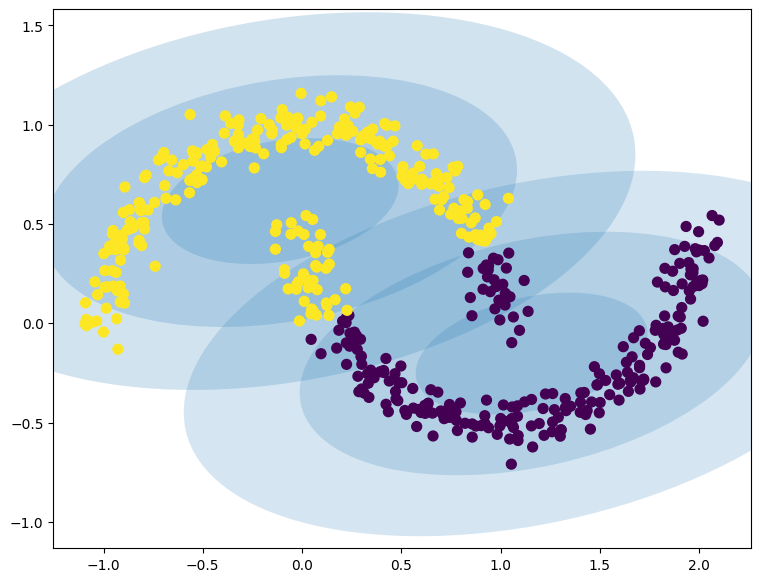

In [ ]:
gmm2 = mix.GaussianMixture(n_components=2, covariance_type='full',
                          random_state=random_state)
plot_gmm(gmm2, X_mn)

If we try to cluster this data set we run into the same issue as before.

Instead let's ignore individual clusters and model the whole distribution of data as a collection of many Gaussians.


如果我们尝试对该数据集进行聚类，我们会遇到与之前相同的问题。

相反，让我们忽略单个聚类，将整个数据分布建模为许多高斯分布的集合。

<ipython-input-21-b4a42385a8d6>:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


Text(0.5, 1.0, 'Collective Gaussian clusters')

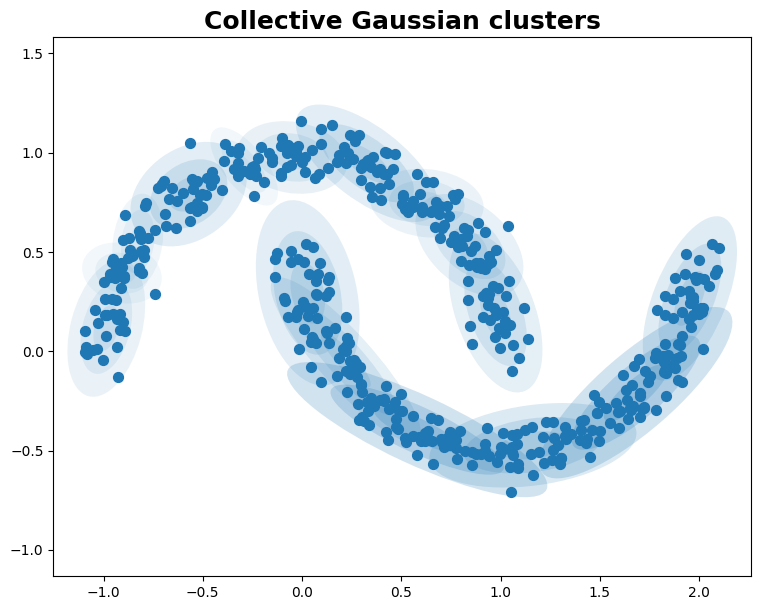

In [ ]:
gmm16 = mix.GaussianMixture(n_components=16, covariance_type='full',
                           random_state=random_state)

plot_gmm(gmm16, X_mn, label=False)
plt.title('Collective Gaussian clusters',
            fontsize=18, fontweight='demi')#集体高斯聚类

Looks like the collection of clusters has fit the data set reasonably well. Now let's see if the model has actually _learned_ about this data set, such that we can create entirely new samples that _look_ like the original.


看起来集群集合与数据集的拟合度相当好。现在让我们看看模型是否真的“学习”了这个数据集，这样我们就可以创建与原始数据集相似的全新样本。

Text(0.5, 1.0, 'New samples drawn from fitted model')

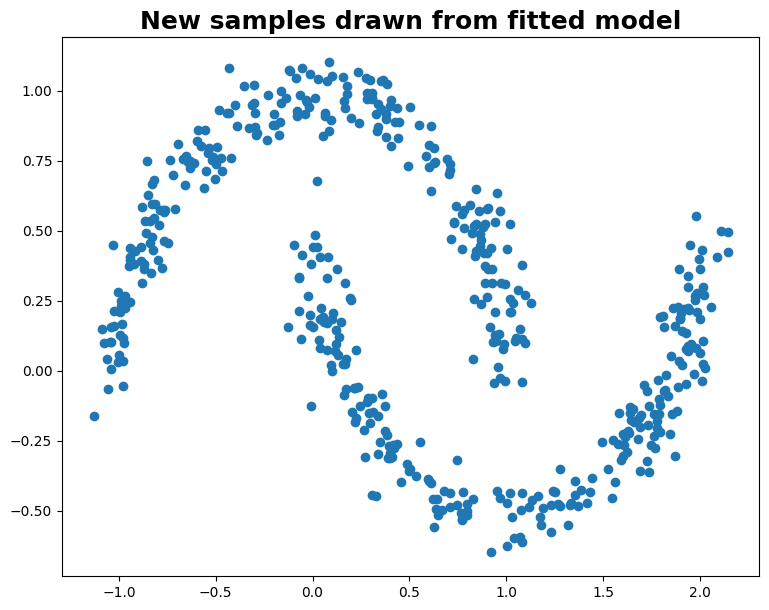

In [ ]:
Xnew, ynew = gmm16.sample(500)

fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(Xnew[:, 0], Xnew[:, 1]);
ax.set_title('New samples drawn from fitted model',
            fontsize=18, fontweight='demi')#从拟合模型中抽取的新样本

Generative models allow for multiple methods to determine optimal number of components. Because it is a probability distribution we can evaluate the likelihood of the data using cross validation and/or using AIC or BIC.

Sklearn makes this easy.


生成模型允许使用多种方法来确定最佳组件数量。由于它是概率分布，因此我们可以使用交叉验证和/或使用 AIC 或 BIC 来评估数据的可能性。

Sklearn 使这变得简单。

Text(0.5, 0, 'n_components')

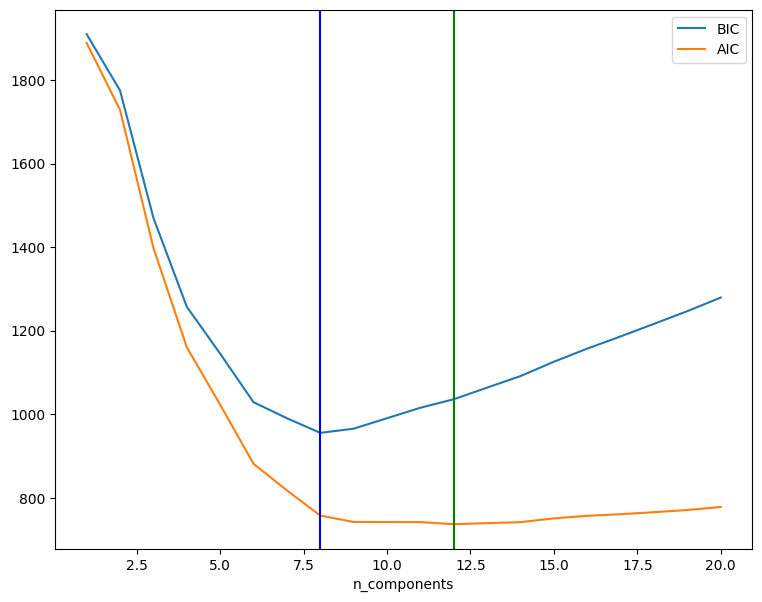

In [ ]:
n_components = np.arange(1, 21)
models = [mix.GaussianMixture(n, covariance_type='full',
                             random_state=random_state).fit(X_mn)
         for n in n_components]

fig, ax = plt.subplots(figsize=(9,7))
ax.plot(n_components, [m.bic(X_mn) for m in models], label='BIC')
ax.plot(n_components, [m.aic(X_mn) for m in models], label='AIC')
ax.axvline(np.argmin([m.bic(X_mn) for m in models])+1, color='blue')
ax.axvline(np.argmin([m.aic(X_mn) for m in models])+1, color='green')

plt.legend(loc='best')
plt.xlabel('n_components')

## Clustering Performance Evaluation 聚类性能评估:
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation